# Install Packages
restart runtime after this and then don't run this cell

In [1]:
!pip install rsatoolbox
!pip install matplotlib==3.6.2
# run this then restart runtime, then run everything else otherwise import rsatoolbox will give error

     |████████████████████████████████| 236 kB 574 kB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 262 kB/s eta 0:00:01
     |████████████████████████████████| 247 kB 404 kB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import matplotlib
import rsatoolbox
import scipy

# Generalization Set RDMs

### Motion Energy RDM

In [20]:
with open("./Outputs/Activations/motion_energies_testset", "rb") as f:
  motion_energies = pickle.load(f)

#### Energies averaged across time before making RDM

In [4]:
motion_energy_avg = []
for k,v in motion_energies.items():
  motion_energy_avg.append(np.mean(v, 0))

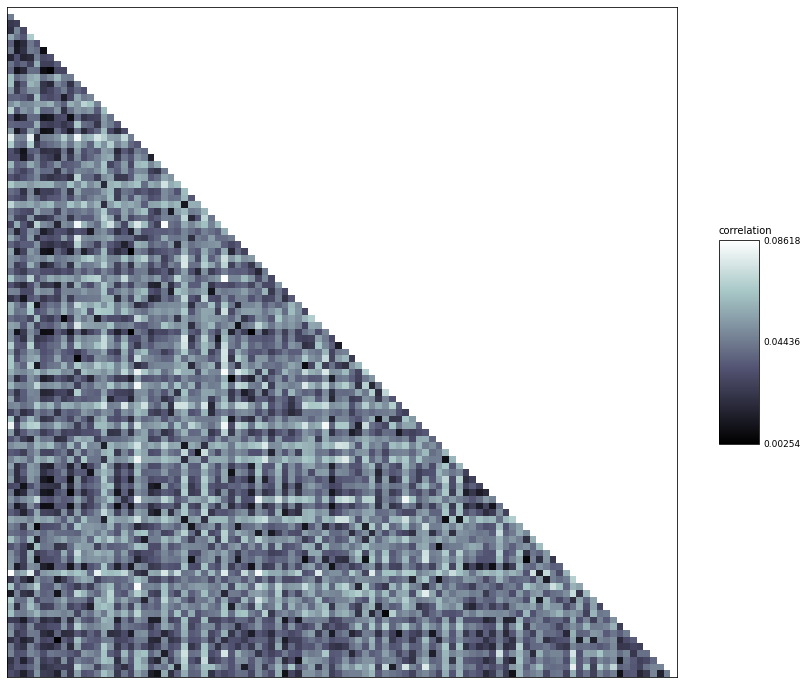

In [5]:
motion_energy = motion_energy_avg #moten_features #
n_videos = len(motion_energies)

data = rsatoolbox.data.Dataset(np.array(motion_energy_avg))
ME_rdm = rsatoolbox.rdm.calc_rdm(data, method = "correlation")
mask = np.triu(np.ones(n_videos, dtype=bool))
rsatoolbox.vis.show_rdm(ME_rdm, figsize=(15,15), show_colorbar='panel', nanmask=mask)
plt.show()


### *HR RDM*

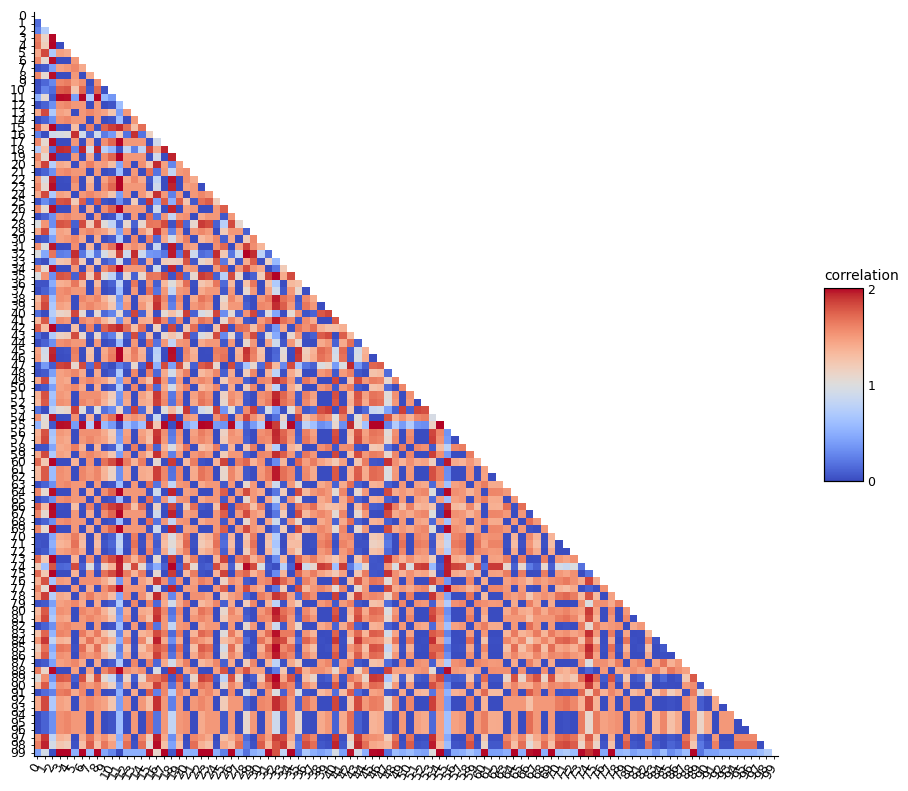

SignificanceResult(statistic=0.018752589728609718, pvalue=0.18712083815555733)


In [10]:
with open('./PHASE/Videos_Test_humanratings', "rb") as f:
  Videos_Test = pickle.load(f)

with open('./PHASE/Human_Experiment_Files/human_rating_labels_all_genset', 'rb') as file:
    human_ratings_all = pickle.load(file)
    human_ratings_all_dict = human_ratings_all.to_dict()

HR_wAmb = {}
for k,v in human_ratings_all_dict['relationship'].items():
  temp = {'friendly':0, 'neutral':0, 'adversarial': 0}
  divisor = float(sum(v.values()))
  for label, count in v.items():
    temp[label] = count/divisor

  id = k.split("/")[-1][:24]
  HR_wAmb[id] = temp

# Order correct and remove example videos
HR_wAmb_list = []
for i,x in enumerate(Videos_Test):
  temp = HR_wAmb[x['name'][:24]]
  HR_wAmb_list.append(list(temp.values()))

HR_wAmb_df = pd.DataFrame(HR_wAmb_list)
data = rsatoolbox.data.Dataset(HR_wAmb_df.values)
HR_wAmb_rdm = rsatoolbox.rdm.calc_rdm(data, method = "correlation")

mask = np.triu(np.ones(n_videos, dtype=bool))
rsatoolbox.vis.show_rdm(HR_wAmb_rdm, figsize=(12,10), show_colorbar='panel', nanmask=mask, pattern_descriptor='index', cmap ='coolwarm')

sns.despine()
plt.show()

# Spearman Corr with ME
print(scipy.stats.spearmanr(ME_rdm.dissimilarities[0], HR_wAmb_rdm.dissimilarities[0]))

### *SocialGNN RDM*

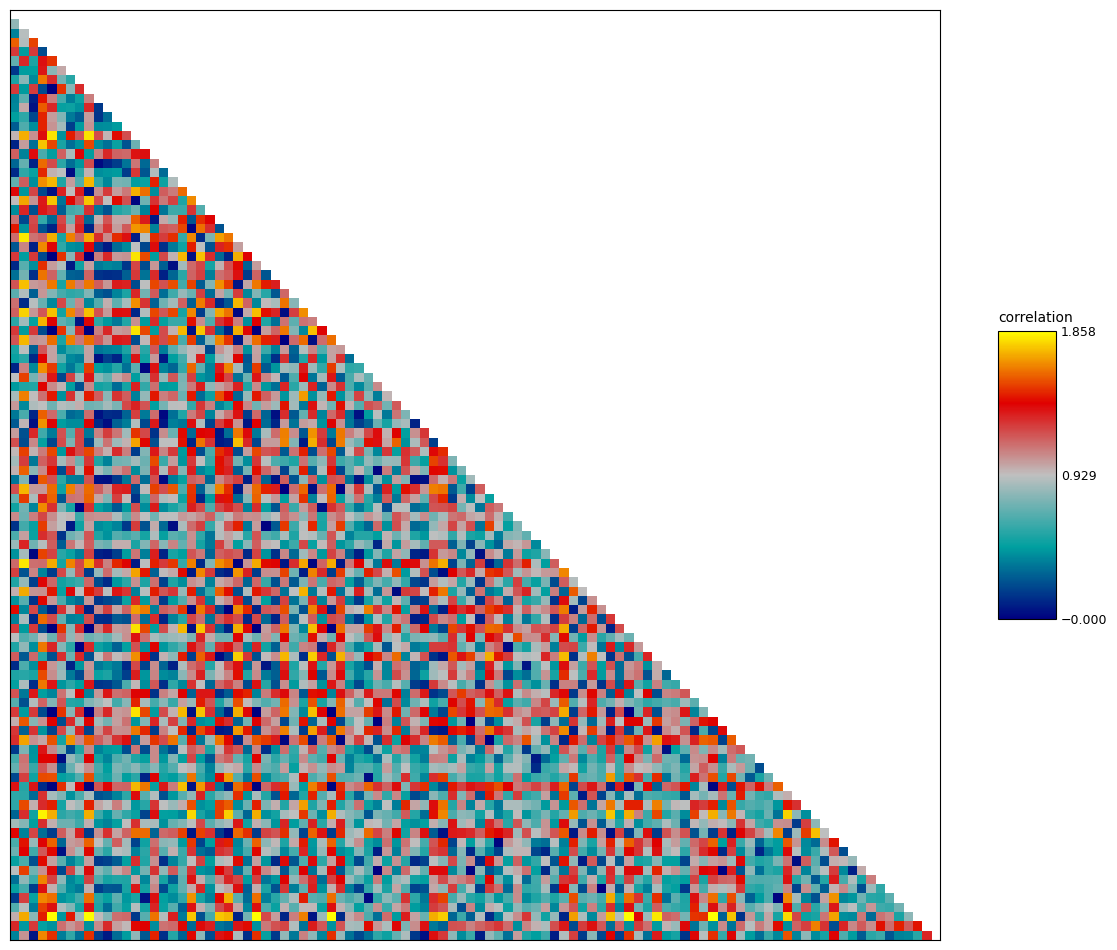

SignificanceResult(statistic=0.5143122205495483, pvalue=0.0)
[[0.06887569]]
SignificanceResult(statistic=0.06887569387394075, pvalue=1.2323062761955642e-06)


In [11]:
#with open('semifinal_layer_activationsPHASE_originalsplit_withcontext_June28_SocialGNN_E', "rb") as f:
#  SocialGNN_act = pickle.load(f)
with open('./Outputs/Activations/RNN_activations_PHASE_originalsplit_contextTrue_20230515_SocialGNN_E_generalization_set_16-05-2023', "rb") as f:
   SocialGNN_act = pickle.load(f)

SocialGNN_genset = {}
for i,x in enumerate(Videos_Test):
  #SocialGNN_genset[x['name'][:24]] = SocialGNN_act[i]
  SocialGNN_genset[x['name'][:24]] = SocialGNN_act[x['name']]

n_videos = len(SocialGNN_genset)

SocialGNN_df = pd.DataFrame.from_dict(SocialGNN_genset, orient='index')
data = rsatoolbox.data.Dataset(SocialGNN_df.values)
SocialGNN_new_rdm = rsatoolbox.rdm.calc_rdm(data, method = "correlation")

mask = np.triu(np.ones(n_videos, dtype=bool))
rsatoolbox.vis.show_rdm(SocialGNN_new_rdm, figsize=(15,15), show_colorbar='panel', nanmask=mask, cmap ='classic' )
plt.show()

# Spearman Corr with HR
print(scipy.stats.spearmanr(SocialGNN_new_rdm.dissimilarities[0], HR_wAmb_rdm.dissimilarities[0]))
# Spearman Corr with ME
print(rsatoolbox.rdm.compare_rho_a(SocialGNN_new_rdm, ME_rdm))
print(scipy.stats.spearmanr(SocialGNN_new_rdm.dissimilarities[0], ME_rdm.dissimilarities[0]))

### *SIMPLE RDM*

               0             1         2
0   6.772125e-01  4.756788e-16  0.322787
1   1.000000e+00  4.202201e-18  0.000000
2   2.838303e-01  1.844502e-19  0.716170
3   1.494706e-26  9.094111e-01  0.090589
4   7.032025e-44  9.990975e-01  0.000902
..           ...           ...       ...
95  5.920554e-01  3.572803e-18  0.407945
96  5.870694e-01  2.248422e-18  0.412931
97  5.309414e-43  5.738142e-43  1.000000
98  2.975953e-01  6.034726e-01  0.098932
99  4.391667e-02  1.836641e-18  0.956083

[100 rows x 3 columns]


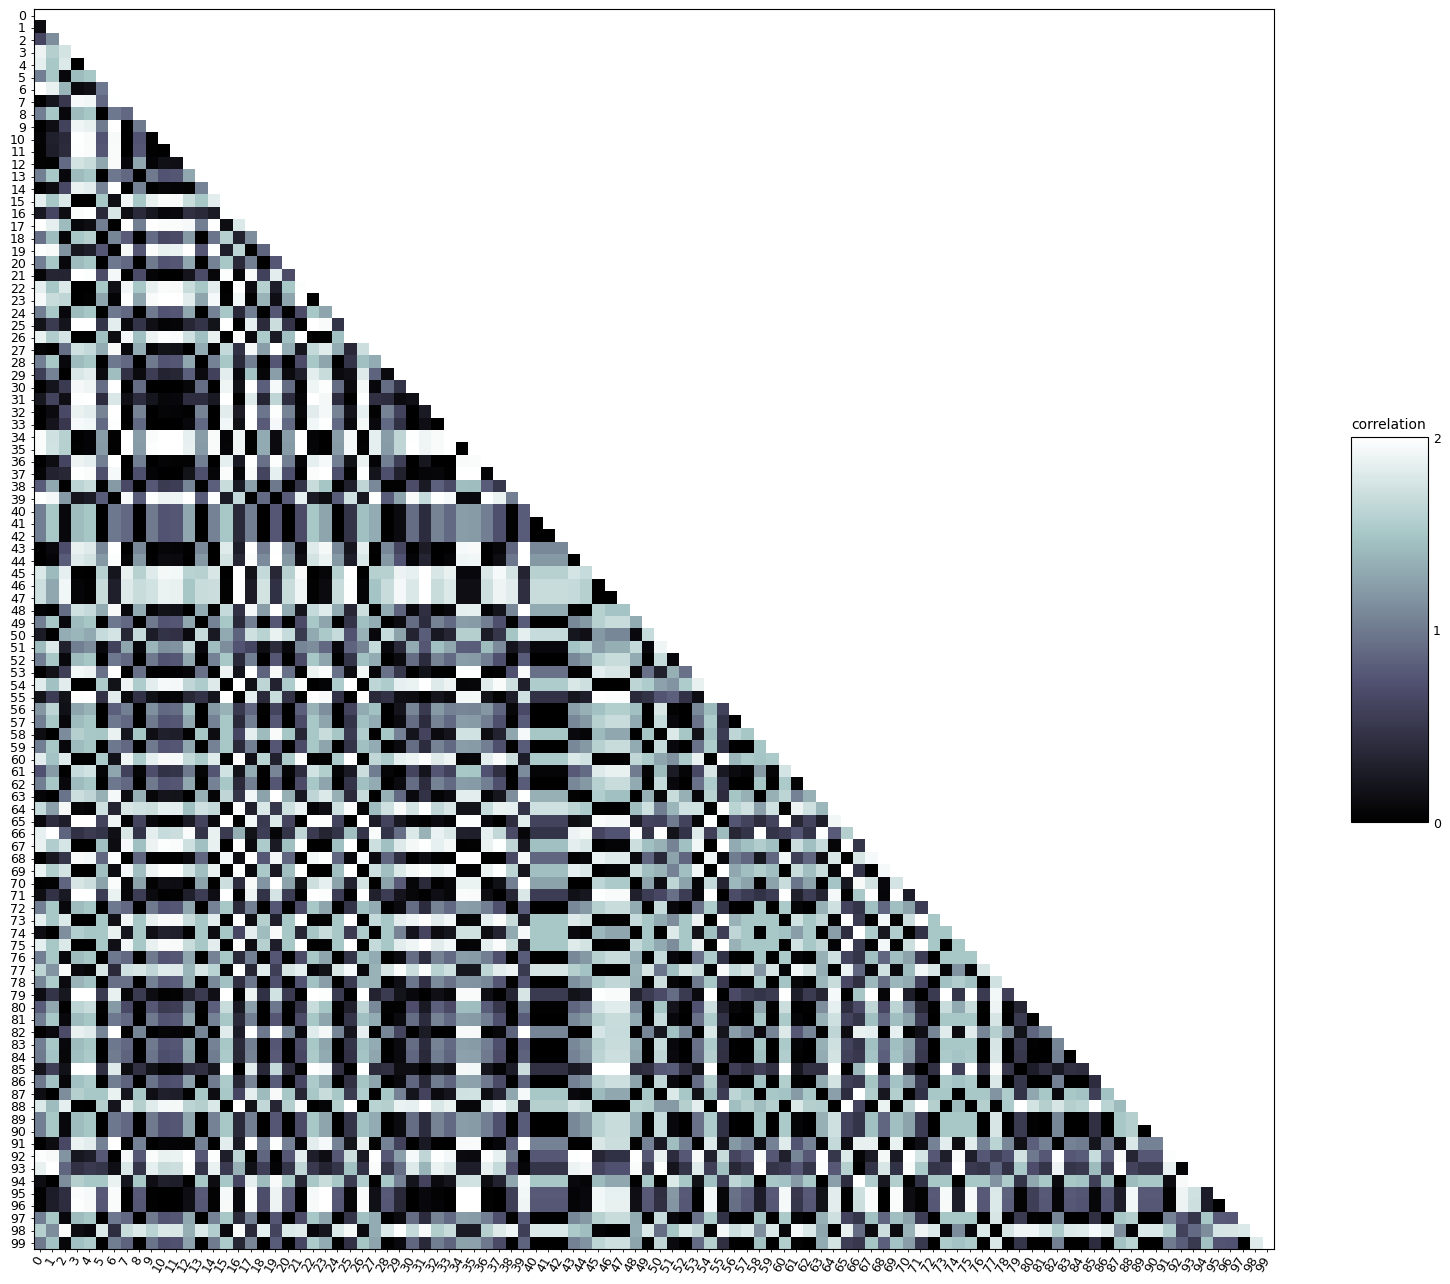

SignificanceResult(statistic=0.5099659980518952, pvalue=0.0)
[[0.02443882]]
SignificanceResult(statistic=0.0244397178130306, pvalue=0.08555810666762471)


In [12]:
with open("./Outputs/Activations/SIMPLE_probabilities_test", "rb") as f:
  probs_relations_all = pickle.load(f)

SIMPLE_genset = {}
for k,v in probs_relations_all.items():
  temp = {'friendly':0, 'neutral':0, 'adversarial': 0}
  for r in v:
    temp[r[0]] = r[1]

  id = k.split("/")[-1][:23]
  SIMPLE_genset[id] = temp

# Order correct
SIMPLE_genset_list = []
for i,x in enumerate(Videos_Test):
  temp = SIMPLE_genset[x['name'][:23]]
  SIMPLE_genset_list.append(list(temp.values()))

SIMPLE_df = pd.DataFrame(SIMPLE_genset_list)
print(SIMPLE_df)
data = rsatoolbox.data.Dataset(SIMPLE_df.values)
SIMPLE_rdm = rsatoolbox.rdm.calc_rdm(data, method = "correlation")

n_videos = len(SIMPLE_genset)
mask = np.triu(np.ones(n_videos, dtype=bool))
rsatoolbox.vis.show_rdm(SIMPLE_rdm, figsize=(20,20), show_colorbar='panel', nanmask=mask,  pattern_descriptor='index')
plt.show()

# Spearman Corr with HR
print(scipy.stats.spearmanr(SIMPLE_rdm.dissimilarities[0], HR_wAmb_rdm.dissimilarities[0]))
# Spearman Corr with ME
print(rsatoolbox.rdm.compare_rho_a(SIMPLE_rdm, ME_rdm))
print(scipy.stats.spearmanr(SIMPLE_rdm.dissimilarities[0], ME_rdm.dissimilarities[0]))

## Correlation and Semipartial Correlation with HR

#### Install pingouin package for semipartial corr

In [13]:
!pip install pingouin --upgrade

     |████████████████████████████████| 198 kB 688 kB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 586 kB/s eta 0:00:01
     |████████████████████████████████| 53 kB 830 kB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 528 kB/s eta 0:00:01305 kB/s eta 0:00:25
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=00e679c6b5719a2be7d2e9cd8b4f66514690d3a847c4e7e0cdbb7683781716ac
  Stored in directory: /Users/mmalik16/Library/Caches/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:

#### Correlation

In [14]:
def statistic(x, y):
    return scipy.stats.spearmanr(x,y)[0]

spearman_r = {'simple_socialgnn' : [], 'simple_hr' : [], 'socialgnn_hr' : []}

data1 = HR_wAmb_rdm.dissimilarities[0]
data2 = SocialGNN_new_rdm.dissimilarities[0]
data3 = SIMPLE_rdm.dissimilarities[0]

observed = statistic(data2,data3)
perm_corr = [statistic(data2, np.random.permutation(data3)) for i in range(10000)]
print(observed, (sum(perm_corr>=observed)+1)/len(perm_corr)*2)
spearman_r['simple_socialgnn'].append(observed)

observed = statistic(data3, data1)
perm_corr = [statistic(data3, np.random.permutation(data1)) for i in range(10000)]
print(observed, (sum(perm_corr>=observed)+1)/len(perm_corr)*2)
spearman_r['simple_hr'].append(observed)

observed = statistic(data2, data1)
perm_corr = [statistic(data2, np.random.permutation(data1)) for i in range(10000)]
print(observed, (sum(perm_corr>=observed)+1)/len(perm_corr)*2)
spearman_r['socialgnn_hr'].append(observed)

0.396396400898713 0.0002
0.5099659980518952 0.0002
0.5143122205495483 0.0002


,0,1
0,0.514312,0.509966


/var/folders/zl/yjjv711s5cv2761fc92nr3znygt67c/T/ipykernel_65367/1025062246.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_yticklabels(f.get_yticklabels(),rotation = 0, weight = "bold")


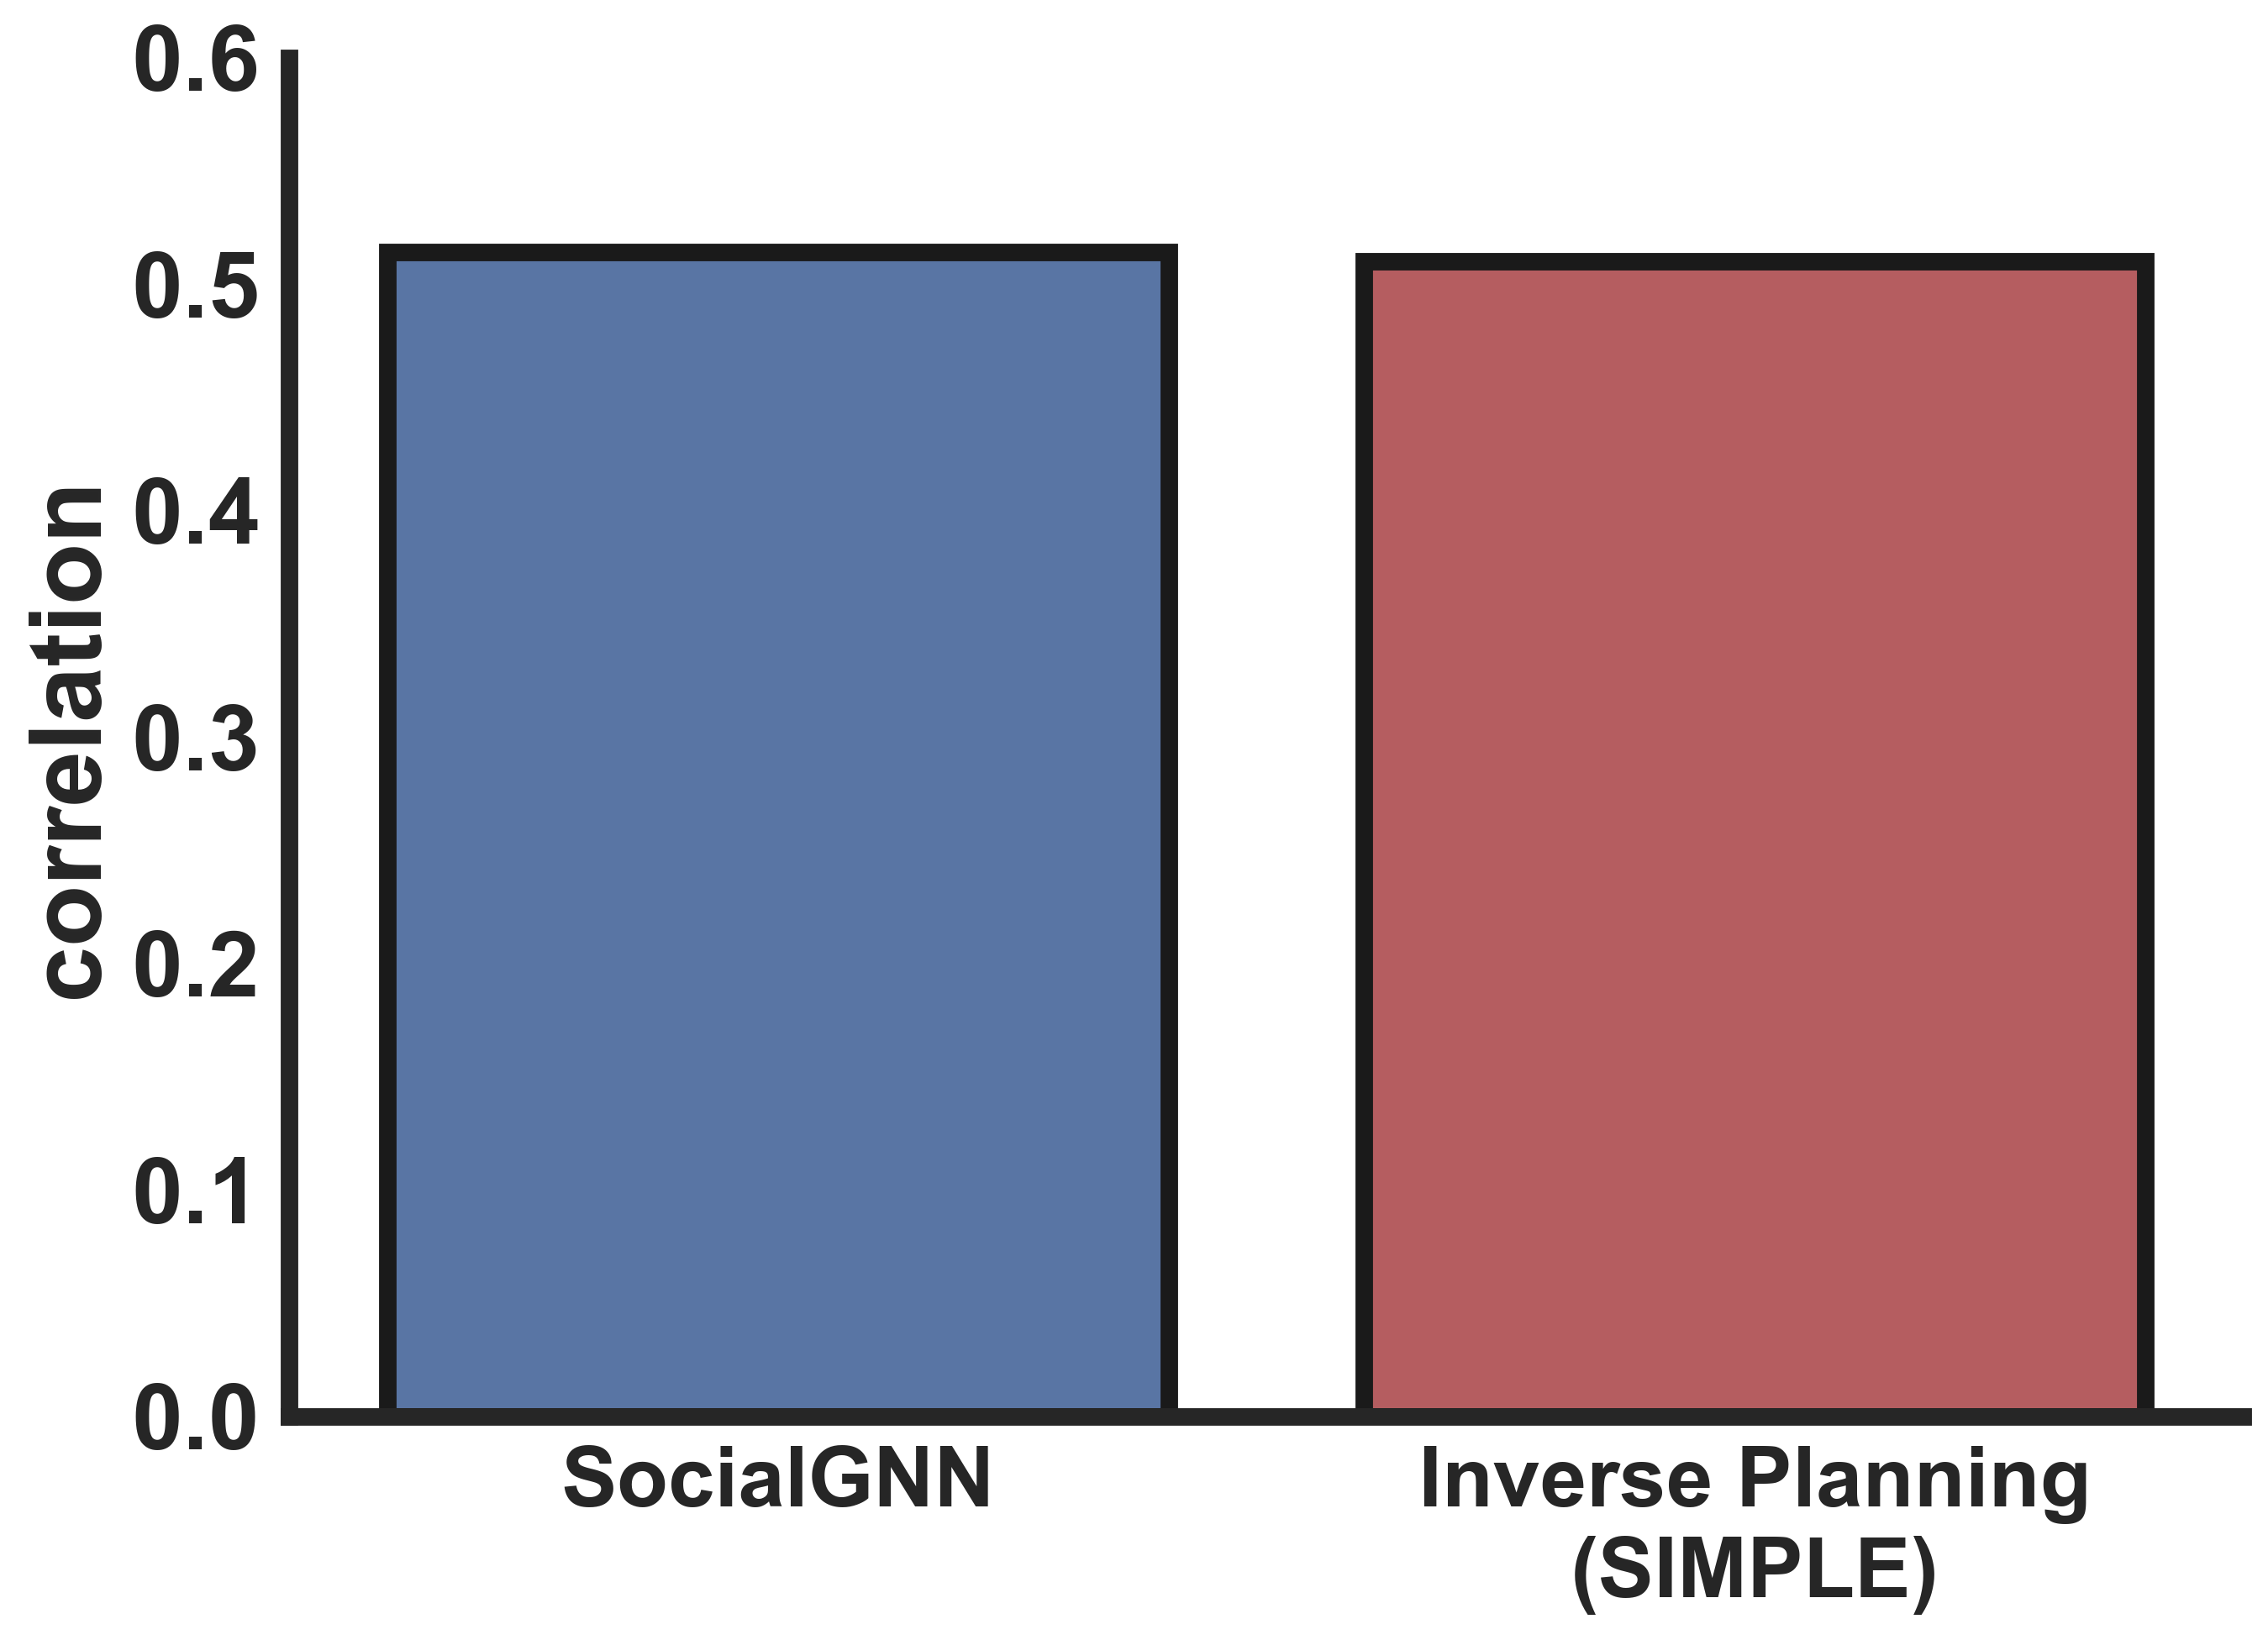

In [15]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, context = "paper", font_scale = 3, style="white")
plt.rcParams["figure.figsize"] = (10,7)

df = pd.DataFrame([spearman_r['socialgnn_hr'], spearman_r['simple_hr']]).T
display(df)

#p = [(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]
p = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),   (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]
f = sns.barplot(data=df, palette = p, linewidth = 5, errwidth = 5, edgecolor ='k')
f.set(xlabel=None)
plt.ylabel('correlation', weight="bold")
f.set_xticklabels(['SocialGNN', 'Inverse Planning (SIMPLE)'],rotation = 0, weight = "bold", fontsize=24)
import textwrap
f.set_xticklabels(textwrap.fill(x.get_text(), 20) for x in f.get_xticklabels())
f.set_yticklabels(f.get_yticklabels(),rotation = 0, weight = "bold")

#plt.text(x=0-0.1, y=0.6, s="****")
#plt.text(x=1-0.1, y=0.6, s="****")

plt.ylim(0,0.6)

sns.despine()
f.spines['left'].set_linewidth(5)
f.spines['bottom'].set_linewidth(5)

#plt.savefig("PHASE_genset_corr2.png", bbox_inches = 'tight', transparent = True)

plt.show()

#### Semi-partial Correlation

In [16]:
import pingouin
def statistic_sr(x,y,z):
  df = pd.DataFrame(list(zip(x, y, z)),
               columns =['HR', 'X', 'Z'])
  return df.partial_corr(x='X', y='HR', x_covar=[ 'Z'], method='spearman')['r'][0]

semipartial_r = { 'socialgnn_hr' : [], 'simple_hr' : []}

data1 = HR_wAmb_rdm.dissimilarities[0]
data2 = SocialGNN_new_rdm.dissimilarities[0]
data3 = SIMPLE_rdm.dissimilarities[0]

observed = statistic_sr(data1,data2,data3)
perm_corr = [statistic_sr(np.random.permutation(data1), data2,data3) for i in range(10000)]
print(observed, (sum(perm_corr>=observed)+1)/len(perm_corr)*2)
semipartial_r['socialgnn_hr'].append(observed)

observed = statistic_sr(data1,data3,data2)
perm_corr = [statistic_sr(np.random.permutation(data1), data3,data2) for i in range(10000)]
print(observed, (sum(perm_corr>=observed)+1)/len(perm_corr)*2)
semipartial_r['simple_hr'].append(observed)

semipartial_r

0.34001799214896705 0.0002
0.3334073993592125 0.0002


{'socialgnn_hr': [0.34001799214896705], 'simple_hr': [0.3334073993592125]}

/var/folders/zl/yjjv711s5cv2761fc92nr3znygt67c/T/ipykernel_65367/340519587.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_yticklabels(f.get_yticklabels(),rotation = 0, weight = "bold")


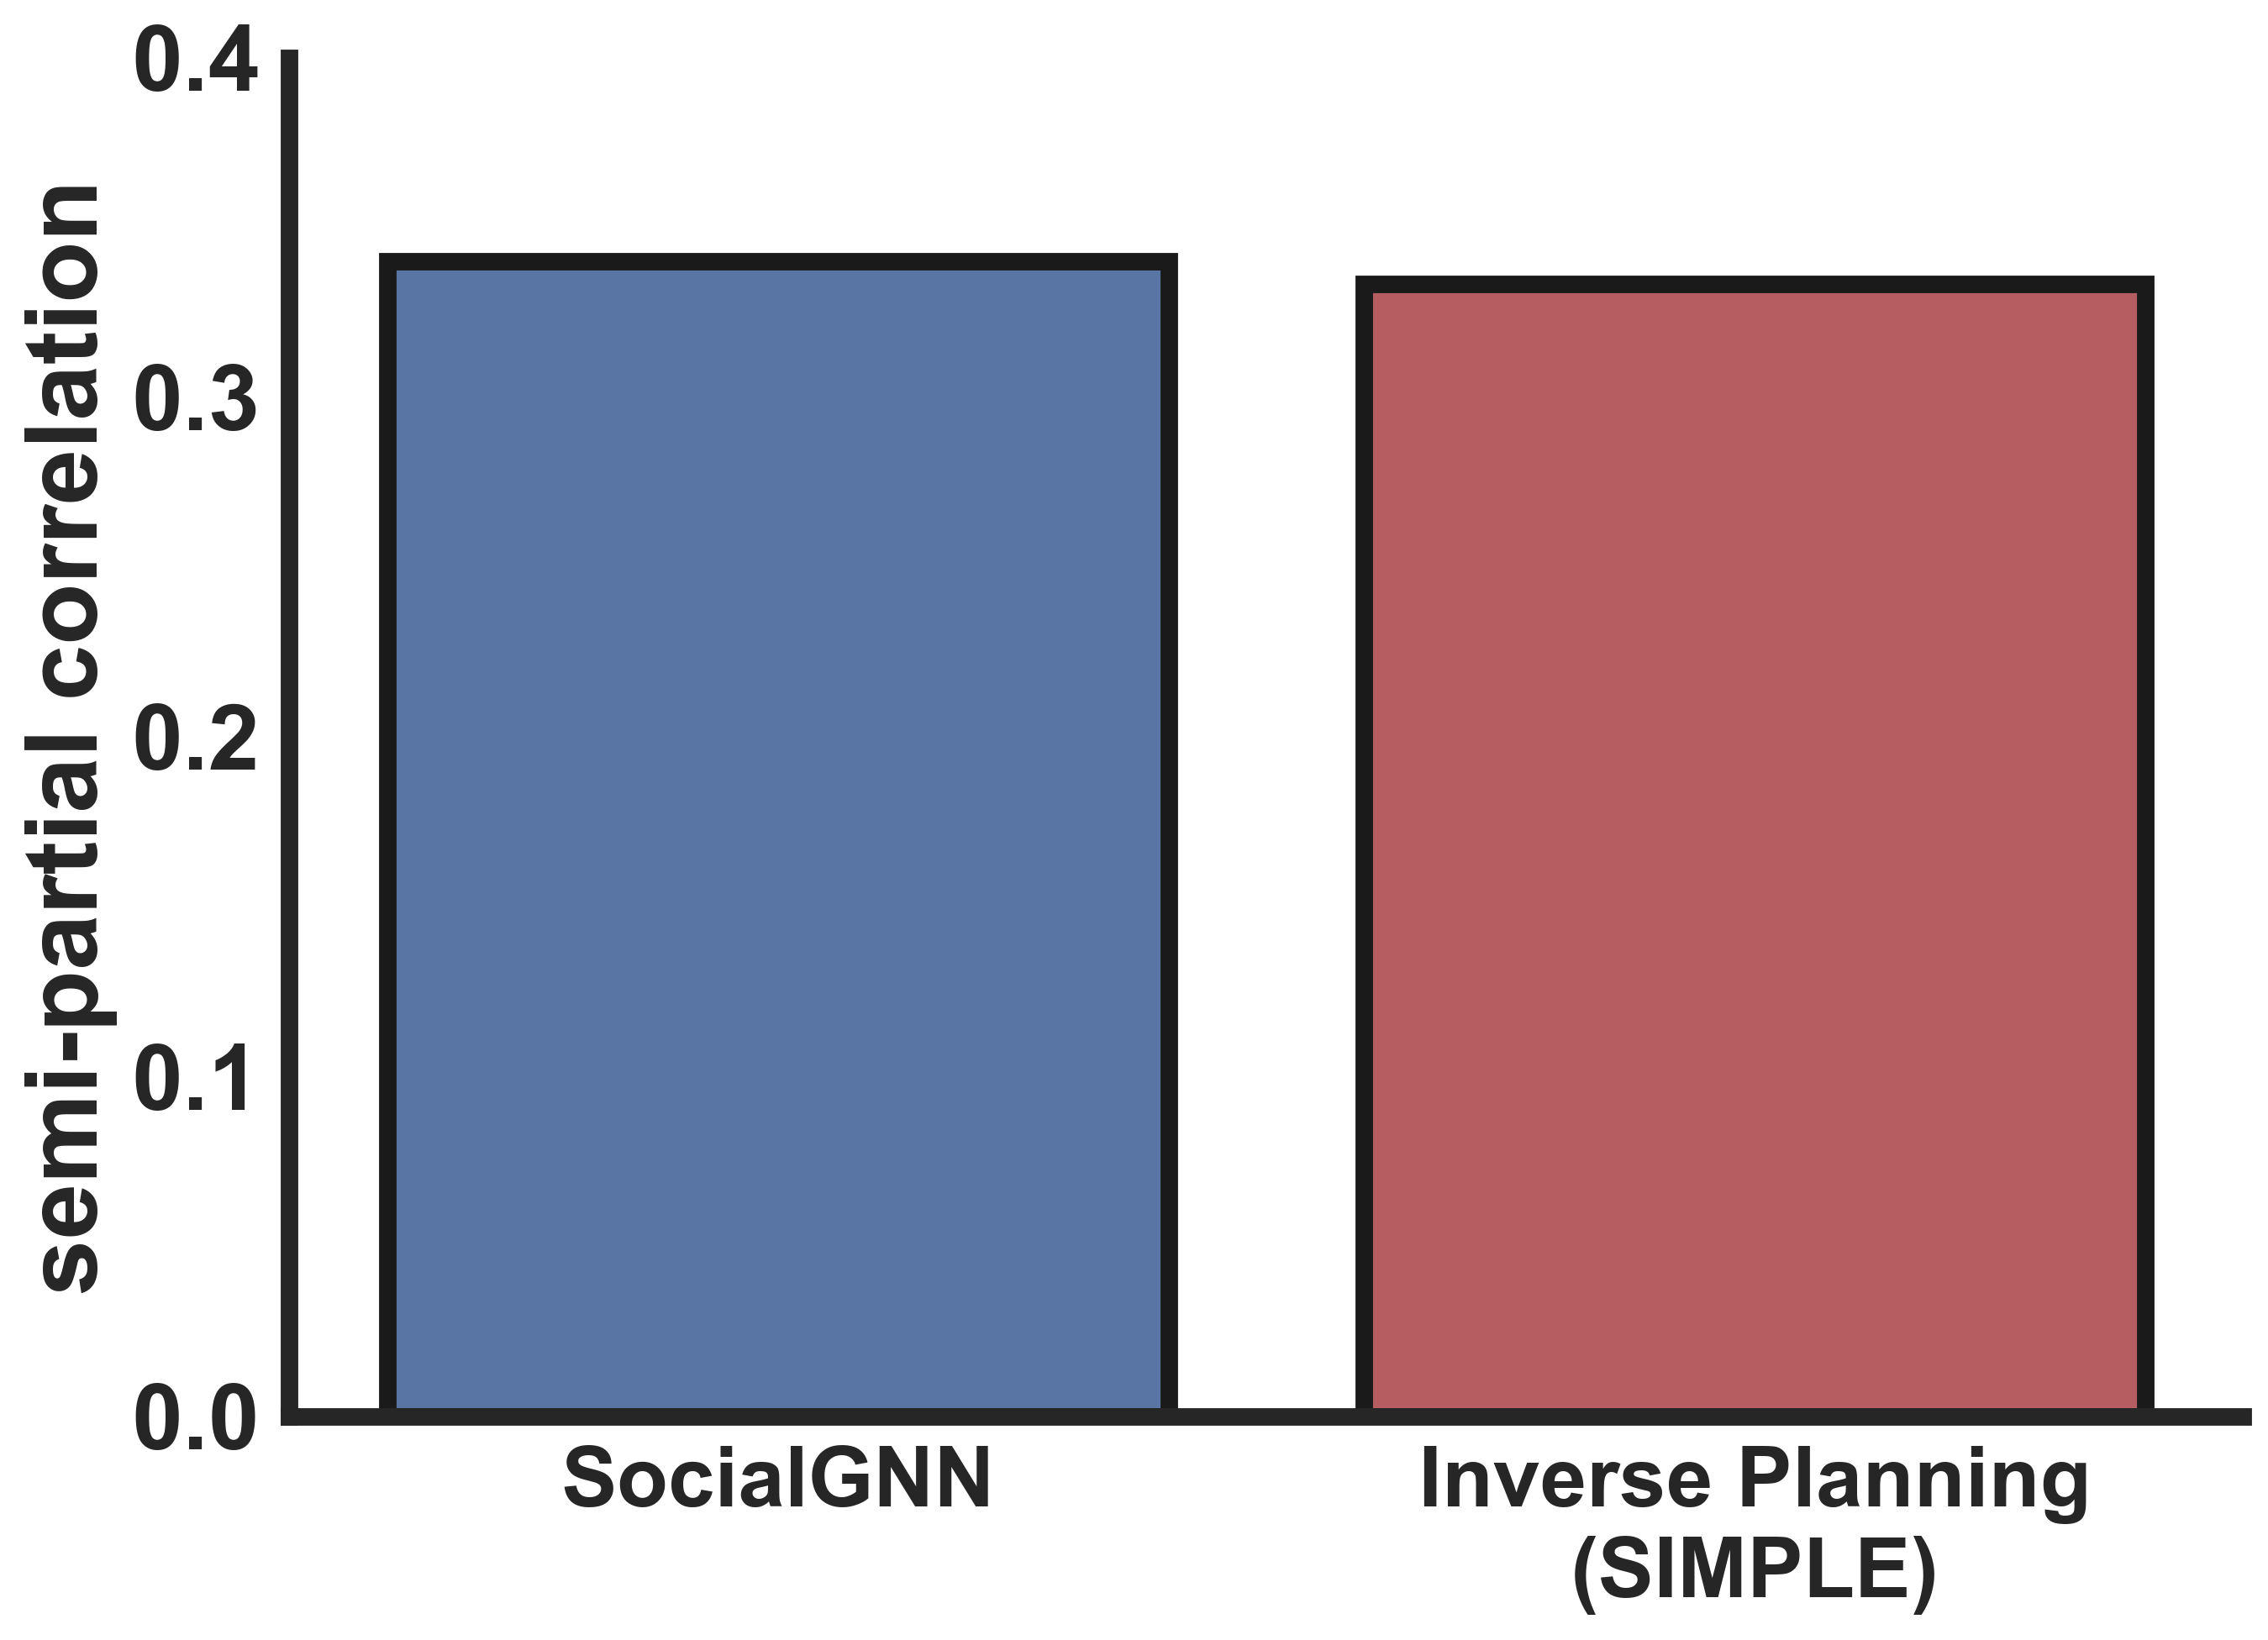

In [17]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, context = "paper", font_scale = 3, style="white")
plt.rcParams["figure.figsize"] = (10,7)


df = pd.DataFrame(semipartial_r)
#p = [(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]
p = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),   (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]
f = sns.barplot(data=df, palette = p, linewidth = 5, errwidth = 5, edgecolor ='k')
f.set(xlabel=None)
plt.ylabel('semi-partial correlation', weight="bold")
f.set_xticklabels(['SocialGNN', 'Inverse Planning (SIMPLE)'],rotation = 0, weight = "bold", fontsize=24)
import textwrap
f.set_xticklabels(textwrap.fill(x.get_text(), 20) for x in f.get_xticklabels())
f.set_yticklabels(f.get_yticklabels(),rotation = 0, weight = "bold")

sns.despine()
f.spines['left'].set_linewidth(5)
f.spines['bottom'].set_linewidth(5)

#plt.text(x=0-0.1, y=0.4, s="****")
#plt.text(x=1-0.1, y=0.4, s="****")

plt.ylim(0,0.4)

#plt.savefig("PHASE_genset_semipartr2.png", bbox_inches = 'tight', transparent = True)

plt.show()

# Main Set RDMs

### *SocialGNN RDM*

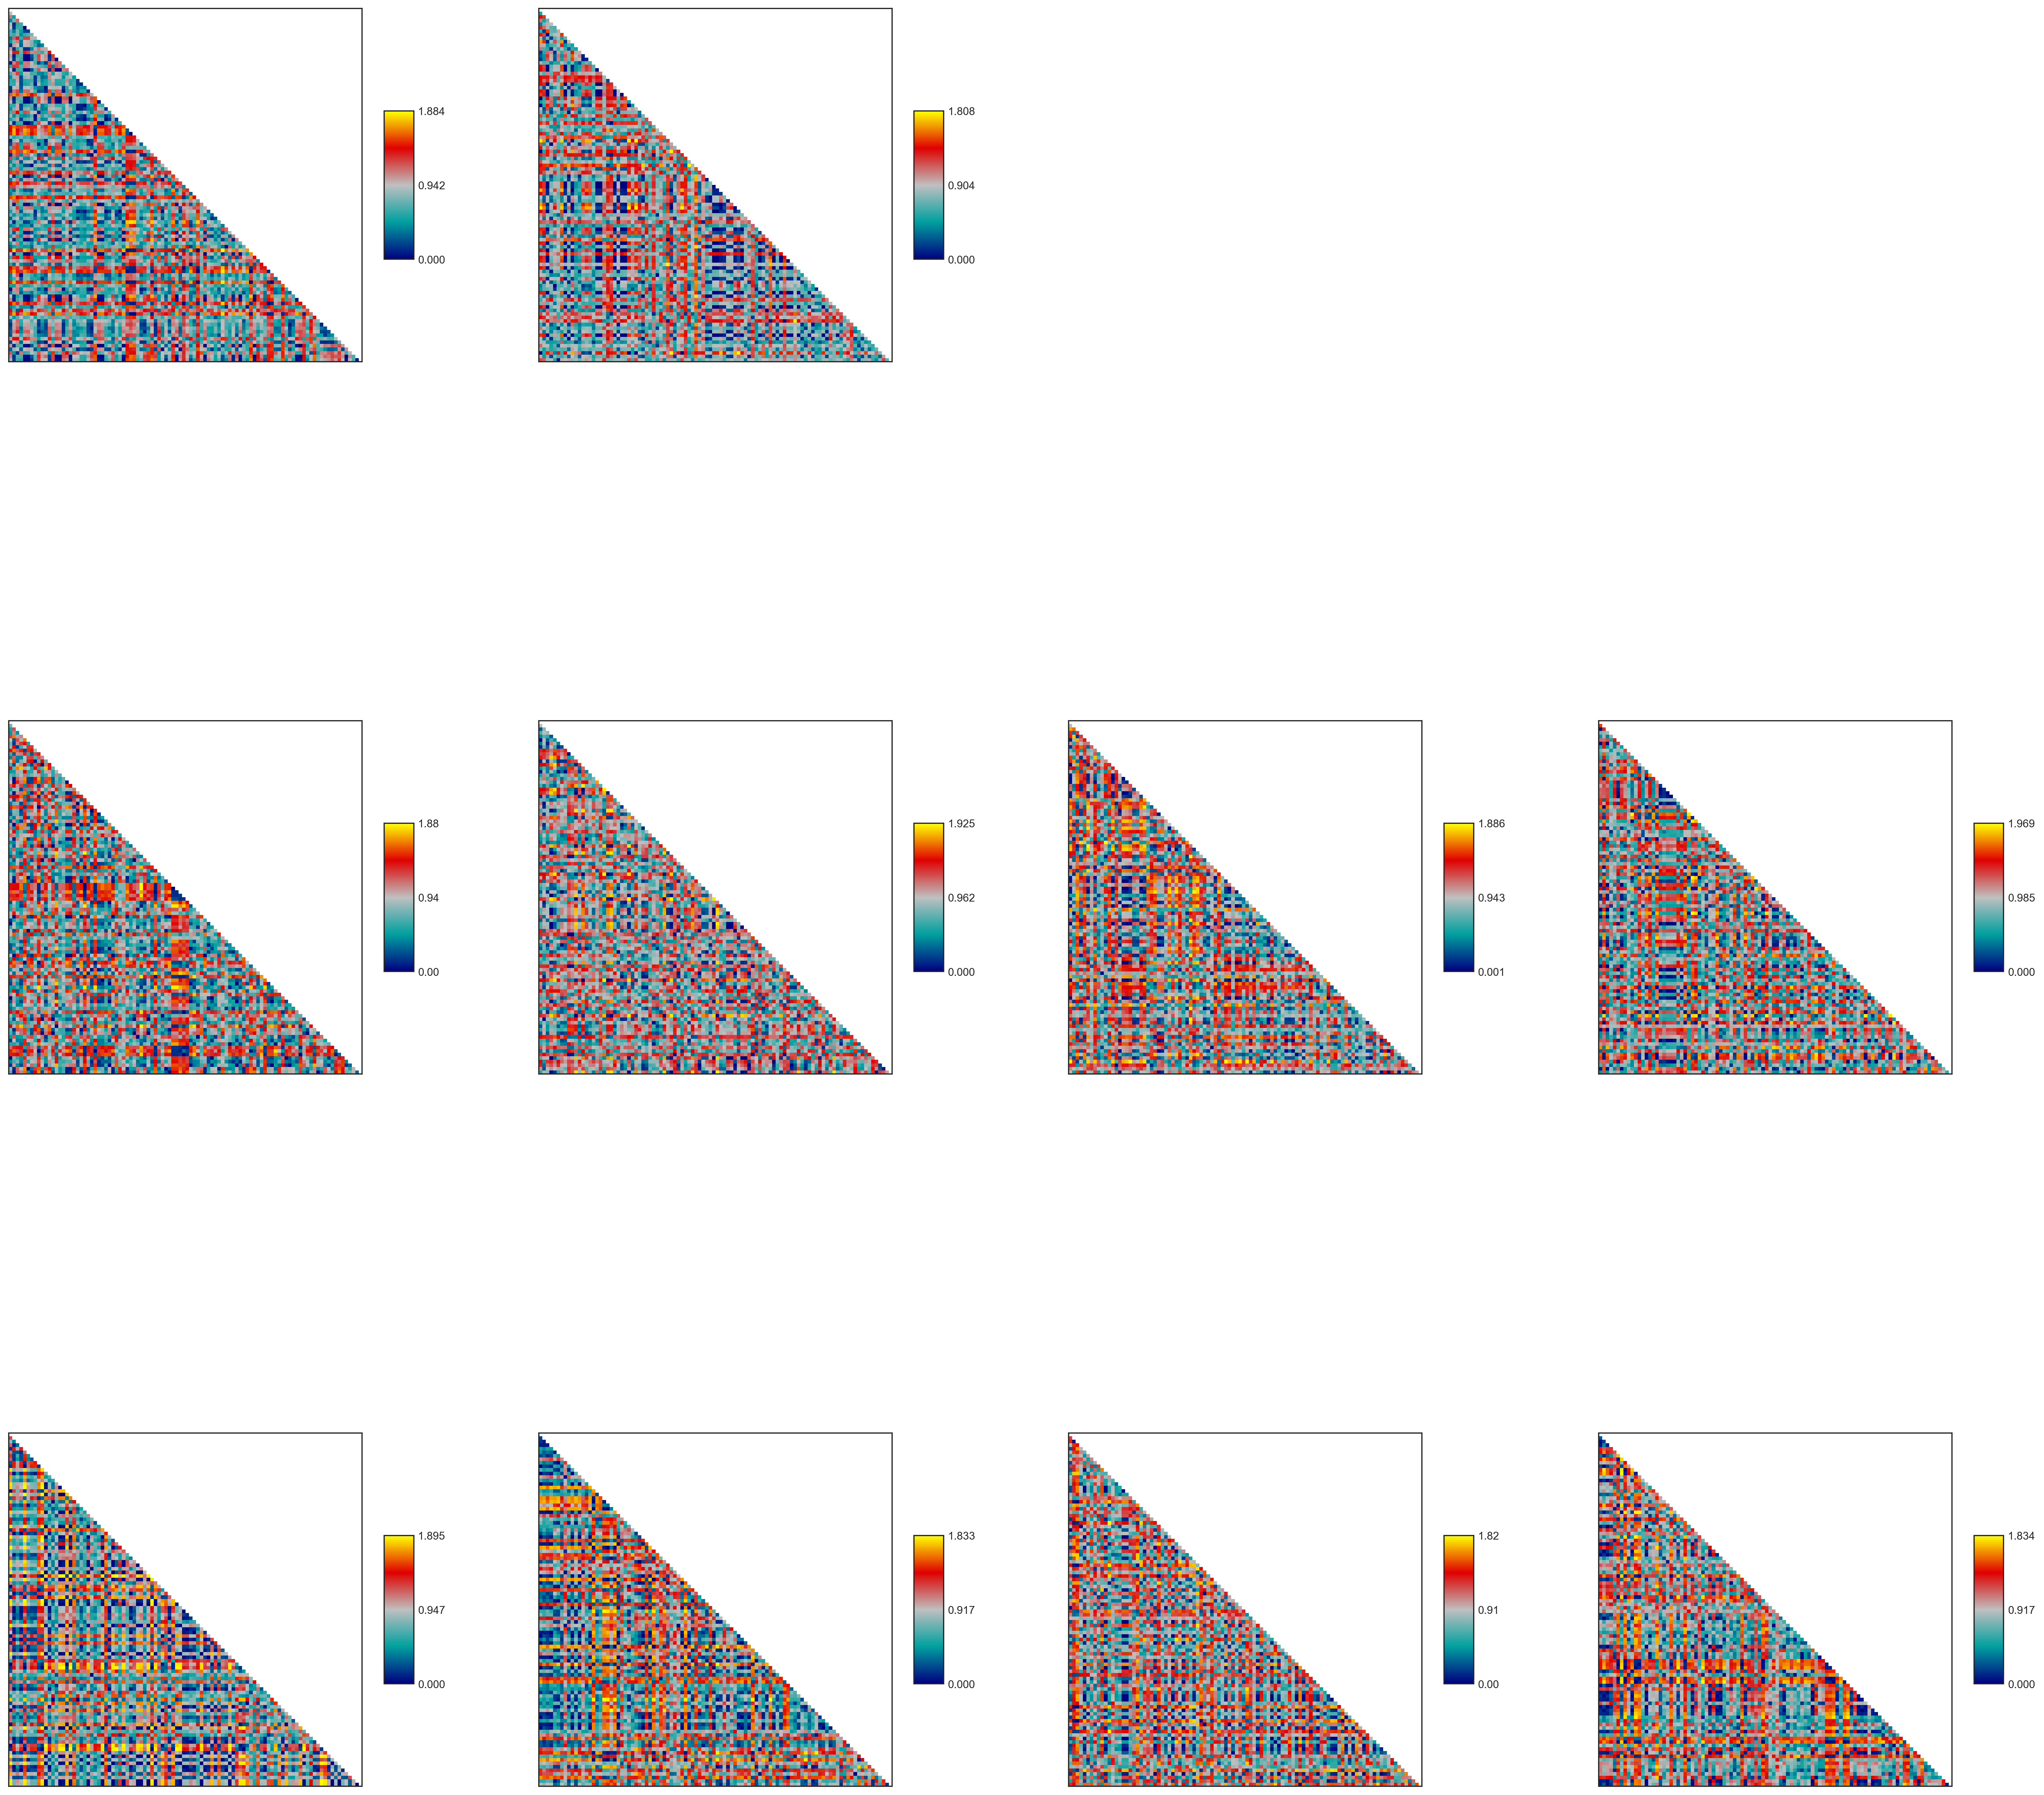

In [ ]:
import sklearn
rdm_list = []
for bootstrap_no in range(10):
  model = 'SocialGNN_E'
  datetime = '15-05-2023'
  with open('./Outputs/Activations/RNN_activations_PHASE_mysplit_humanratings_contextTrue_20230503_' + str(bootstrap_no) + '_' + model + '_main_set_' + datetime, "rb") as f:
    activations = pickle.load(f)

  with open('./Outputs/Predictions/PHASE_mysplit_humanratings_contextTrue_20230503__20230508_' + str(bootstrap_no) + '_SocialGNN_E', "rb") as f:
      true = pickle.load(f)
      pred = pickle.load(f)

  SocialGNN_list = []
  for name in pred.keys():
    SocialGNN_list.append(activations[name])

  n_videos = len(SocialGNN_list)
  df = pd.DataFrame(SocialGNN_list)
  data = rsatoolbox.data.Dataset(df.values)
  rdm = rsatoolbox.rdm.calc_rdm(data, method = "correlation")
  rdm_list.append(rdm)

rdms_SocialGNN = rsatoolbox.rdm.concat(rdm_list)

mask = np.triu(np.ones(n_videos, dtype=bool))
rsatoolbox.vis.show_rdm(rdms_SocialGNN, figsize = (30,30), show_colorbar='panel', nanmask=mask, cmap = "classic")
plt.show()

### *SIMPLE RDM*

D083020_11134500_0_F8_E0
D083020_11134500_0_F8_E0


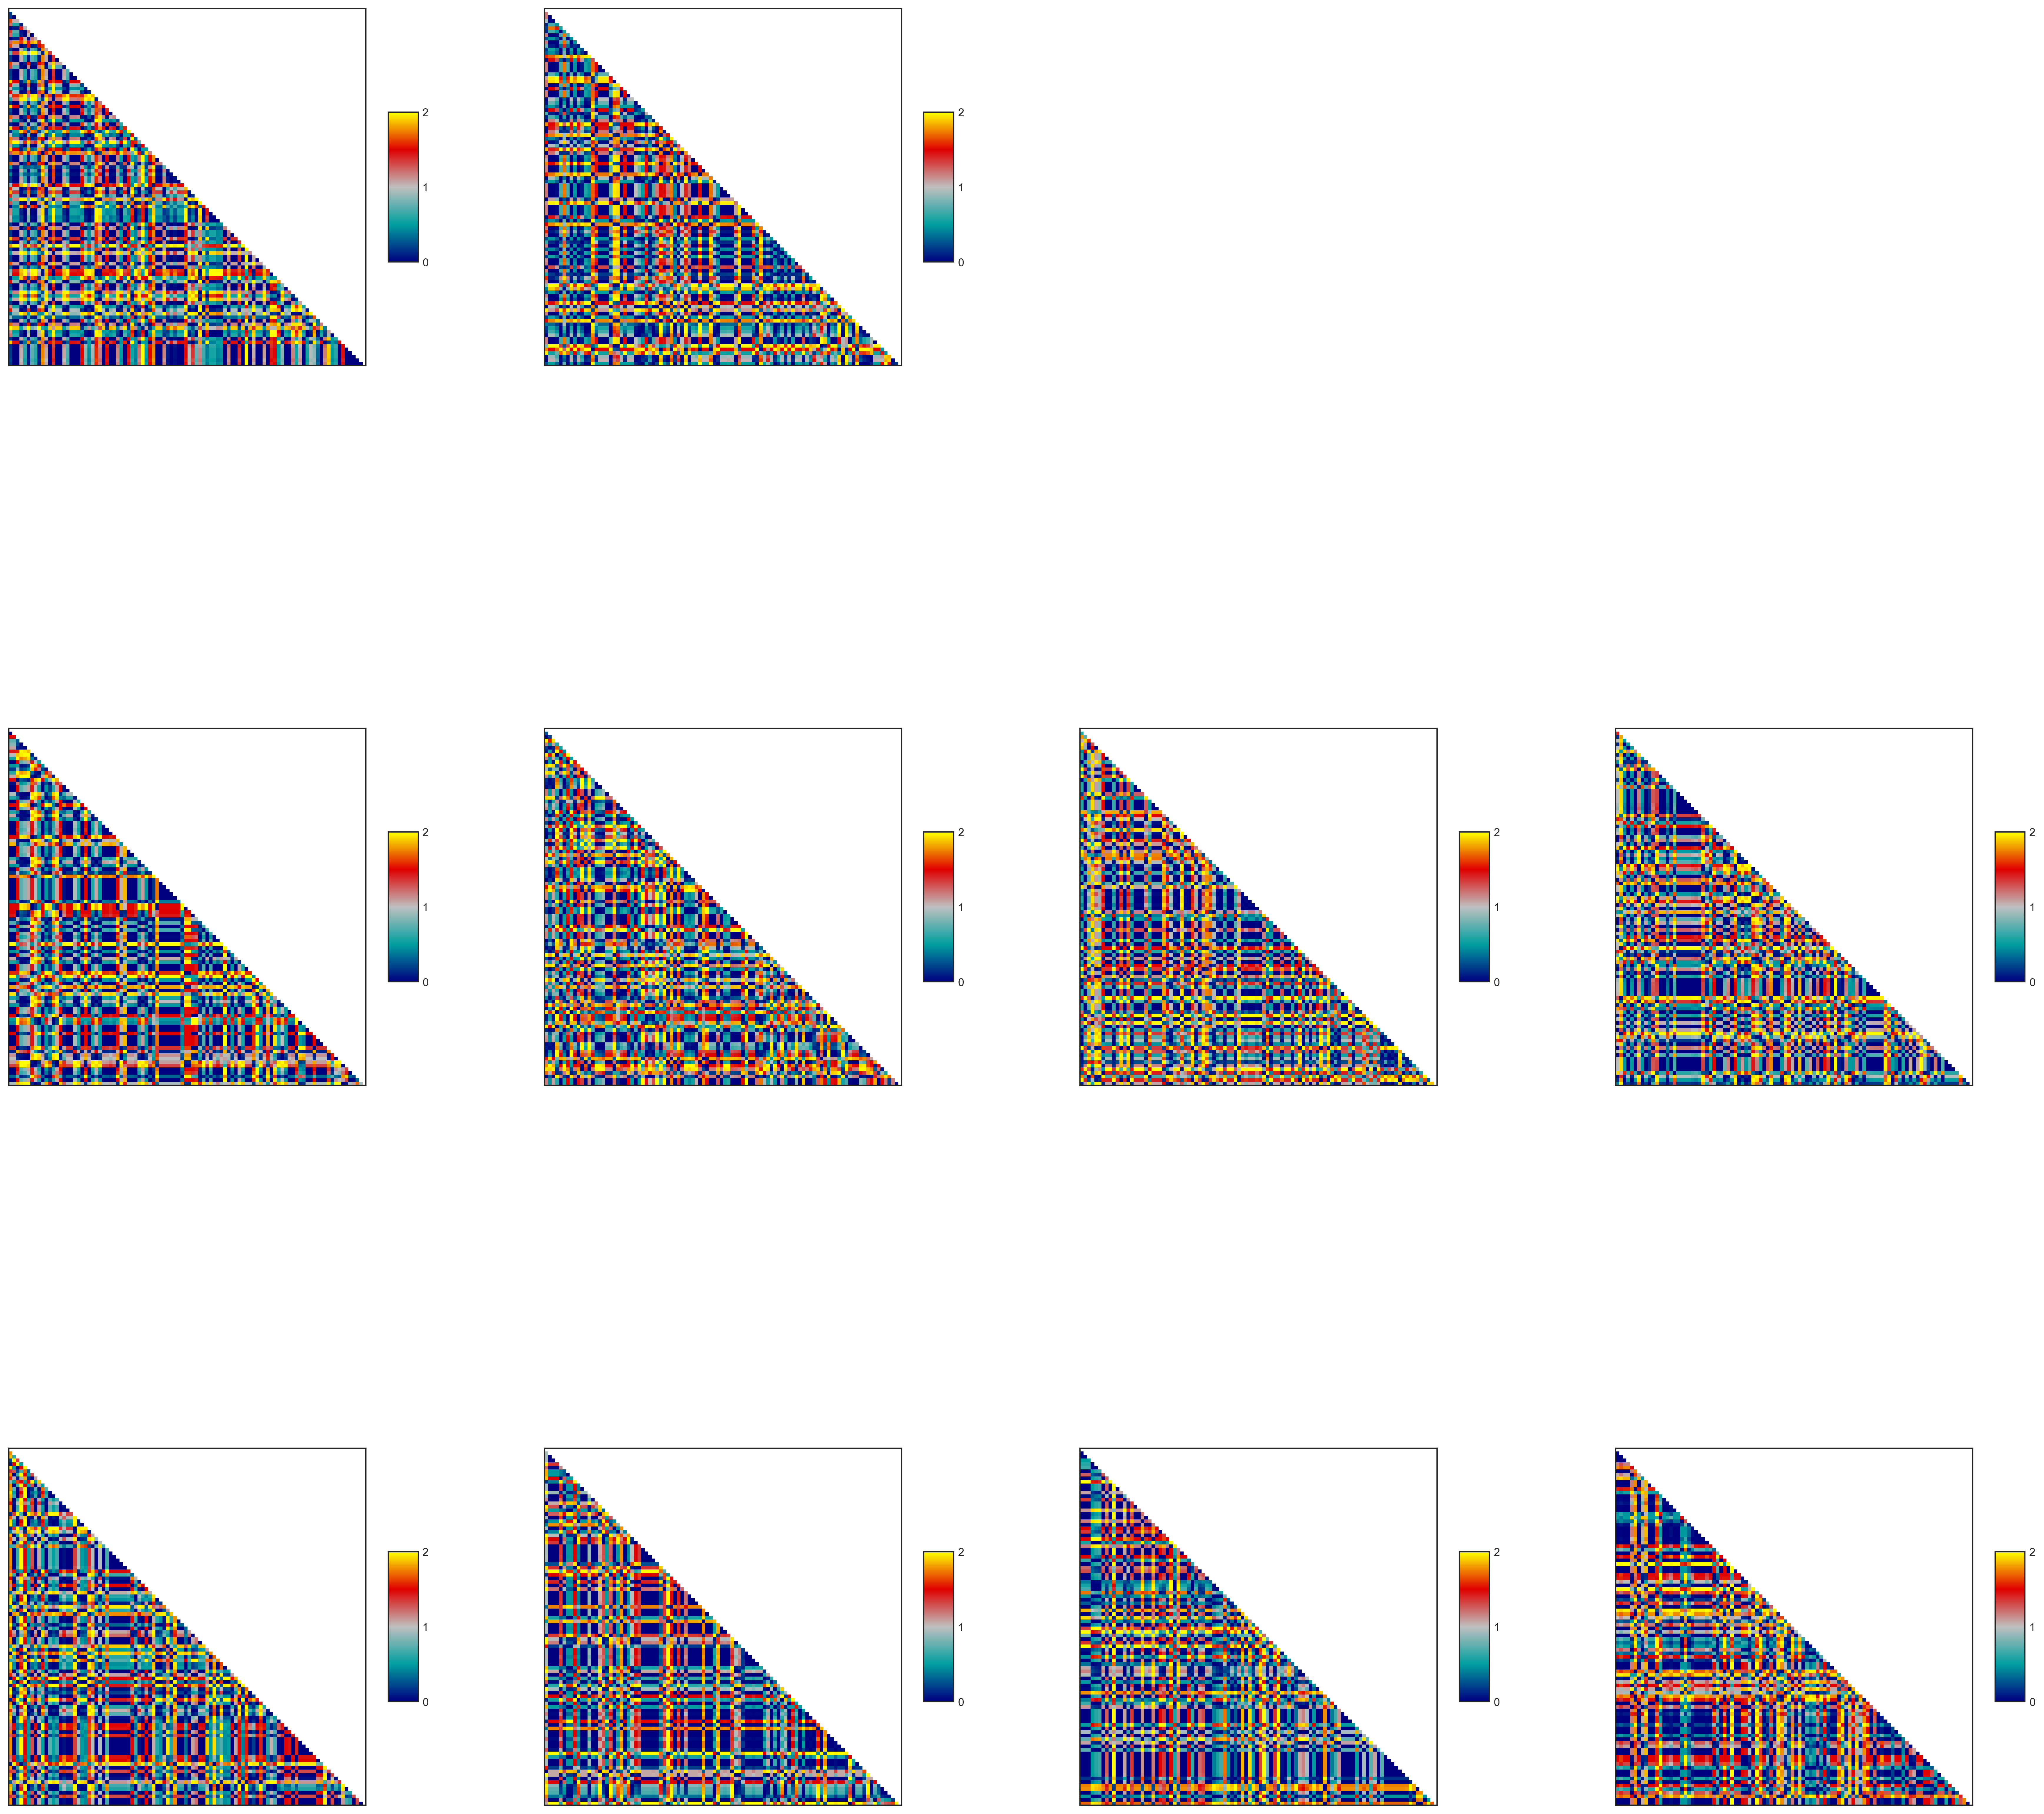

In [26]:
with open("./Outputs/Activations/SIMPLE_probabilities", "rb") as f:
  probs_relations_all = pickle.load(f)

SIMPLE = {}
for k,v in probs_relations_all.items():
  temp = {'friendly':0, 'neutral':0, 'adversarial': 0}
  for r in v:
    temp[r[0]] = r[1]

  id = k.split("/")[-1][:24]
  SIMPLE[id] = temp

rdm_list = []
for bootstrap_no in range(10):
  with open('./Outputs/Predictions/PHASE_mysplit_humanratings_contextTrue_20230503__20230508_' + str(bootstrap_no) + '_SocialGNN_E', "rb") as f:
      true = pickle.load(f)
      pred = pickle.load(f)

  # pick the one in this bootstrap
  SIMPLE_list = []
  for name in pred.keys():
    try:
      temp = SIMPLE[name[:24]]
      SIMPLE_list.append(list(temp.values()))
    except:
      print(name[:24])
      SIMPLE_list.append(list([0.33,0.33,.34])) #need to sum up to 1

  SIMPLE_main_df = pd.DataFrame(SIMPLE_list)
  data = rsatoolbox.data.Dataset(SIMPLE_main_df.values)
  rdm = rsatoolbox.rdm.calc_rdm(data, method = "correlation")
  rdm_list.append(rdm)

  '''
  #just to check bootstrapwise accuracy, very slightly different from saved predictions due to differences in np.argmax/df.idxmax
  simple = SIMPLE_main_df.idxmax(axis=1)
  mapping = {'friendly':0, 'neutral':1, 'adversarial':2}
  check = [simple[i] == mapping[pred] for i,pred in enumerate(true.values())]
  print(sum(check))
  '''

rdms_SIMPLE = rsatoolbox.rdm.concat(rdm_list)

mask = np.triu(np.ones(n_videos, dtype=bool))
rsatoolbox.vis.show_rdm(rdms_SIMPLE, figsize = (30,30), show_colorbar='panel', nanmask=mask, cmap = "classic")
plt.show()


### Motion Energy RDM

In [27]:
rdm_list = []
with open("./Outputs/Activations/motion_energies", "rb") as f:
  temp = pickle.load(f)
  motion_energies = {}
  for k,v in temp.items():
    motion_energies[k[:24]]=v

for bootstrap_no in range(10):
  with open('./Outputs/Predictions/PHASE_mysplit_humanratings_contextTrue_20230503__20230508_' + str(bootstrap_no) + '_SocialGNN_E', "rb") as f:
      true = pickle.load(f)
      pred = pickle.load(f)

  motion_energy_avg = []
  for name in pred.keys():
    motion_energy_avg.append(np.mean(motion_energies[name[:24]], 0))

  data = rsatoolbox.data.Dataset(np.array(motion_energy_avg))
  ME_rdm = rsatoolbox.rdm.calc_rdm(data, method = "correlation")
  rdm_list.append(ME_rdm)

rdms_ME = rsatoolbox.rdm.concat(rdm_list)

In [28]:
print("Correlation and p-values: SocialGNN")
print(np.mean([scipy.stats.spearmanr(rdms_ME[bootstrap_no].dissimilarities[0], rdms_SocialGNN[bootstrap_no].dissimilarities[0])[0] for bootstrap_no in range(10)]), np.std([scipy.stats.spearmanr(rdms_ME[bootstrap_no].dissimilarities[0], rdms_SocialGNN[bootstrap_no].dissimilarities[0])[0] for bootstrap_no in range(10)]))
print(np.mean([scipy.stats.spearmanr(rdms_ME[bootstrap_no].dissimilarities[0], rdms_SocialGNN[bootstrap_no].dissimilarities[0])[1] for bootstrap_no in range(10)]), np.std([scipy.stats.spearmanr(rdms_ME[bootstrap_no].dissimilarities[0], rdms_SocialGNN[bootstrap_no].dissimilarities[0])[1] for bootstrap_no in range(10)]))

print("\nCorrelation and p-values: SIMPLE")
print(np.mean([scipy.stats.spearmanr(rdms_ME[bootstrap_no].dissimilarities[0], rdms_SIMPLE[bootstrap_no].dissimilarities[0])[0] for bootstrap_no in range(10)]), np.std([scipy.stats.spearmanr(rdms_ME[bootstrap_no].dissimilarities[0], rdms_SIMPLE[bootstrap_no].dissimilarities[0])[0] for bootstrap_no in range(10)]))
print(np.mean([scipy.stats.spearmanr(rdms_ME[bootstrap_no].dissimilarities[0], rdms_SIMPLE[bootstrap_no].dissimilarities[0])[1] for bootstrap_no in range(10)]), np.std([scipy.stats.spearmanr(rdms_ME[bootstrap_no].dissimilarities[0], rdms_SIMPLE[bootstrap_no].dissimilarities[0])[1] for bootstrap_no in range(10)]))

Correlation and p-values: SocialGNN
0.06770447098481984 0.0294670307879179
0.011390366565044757 0.02662372755045414

Correlation and p-values: SIMPLE
0.08336497923016938 0.05159034699983535
0.012066211588834082 0.034016992052540315


### *HR w Amb RDM*

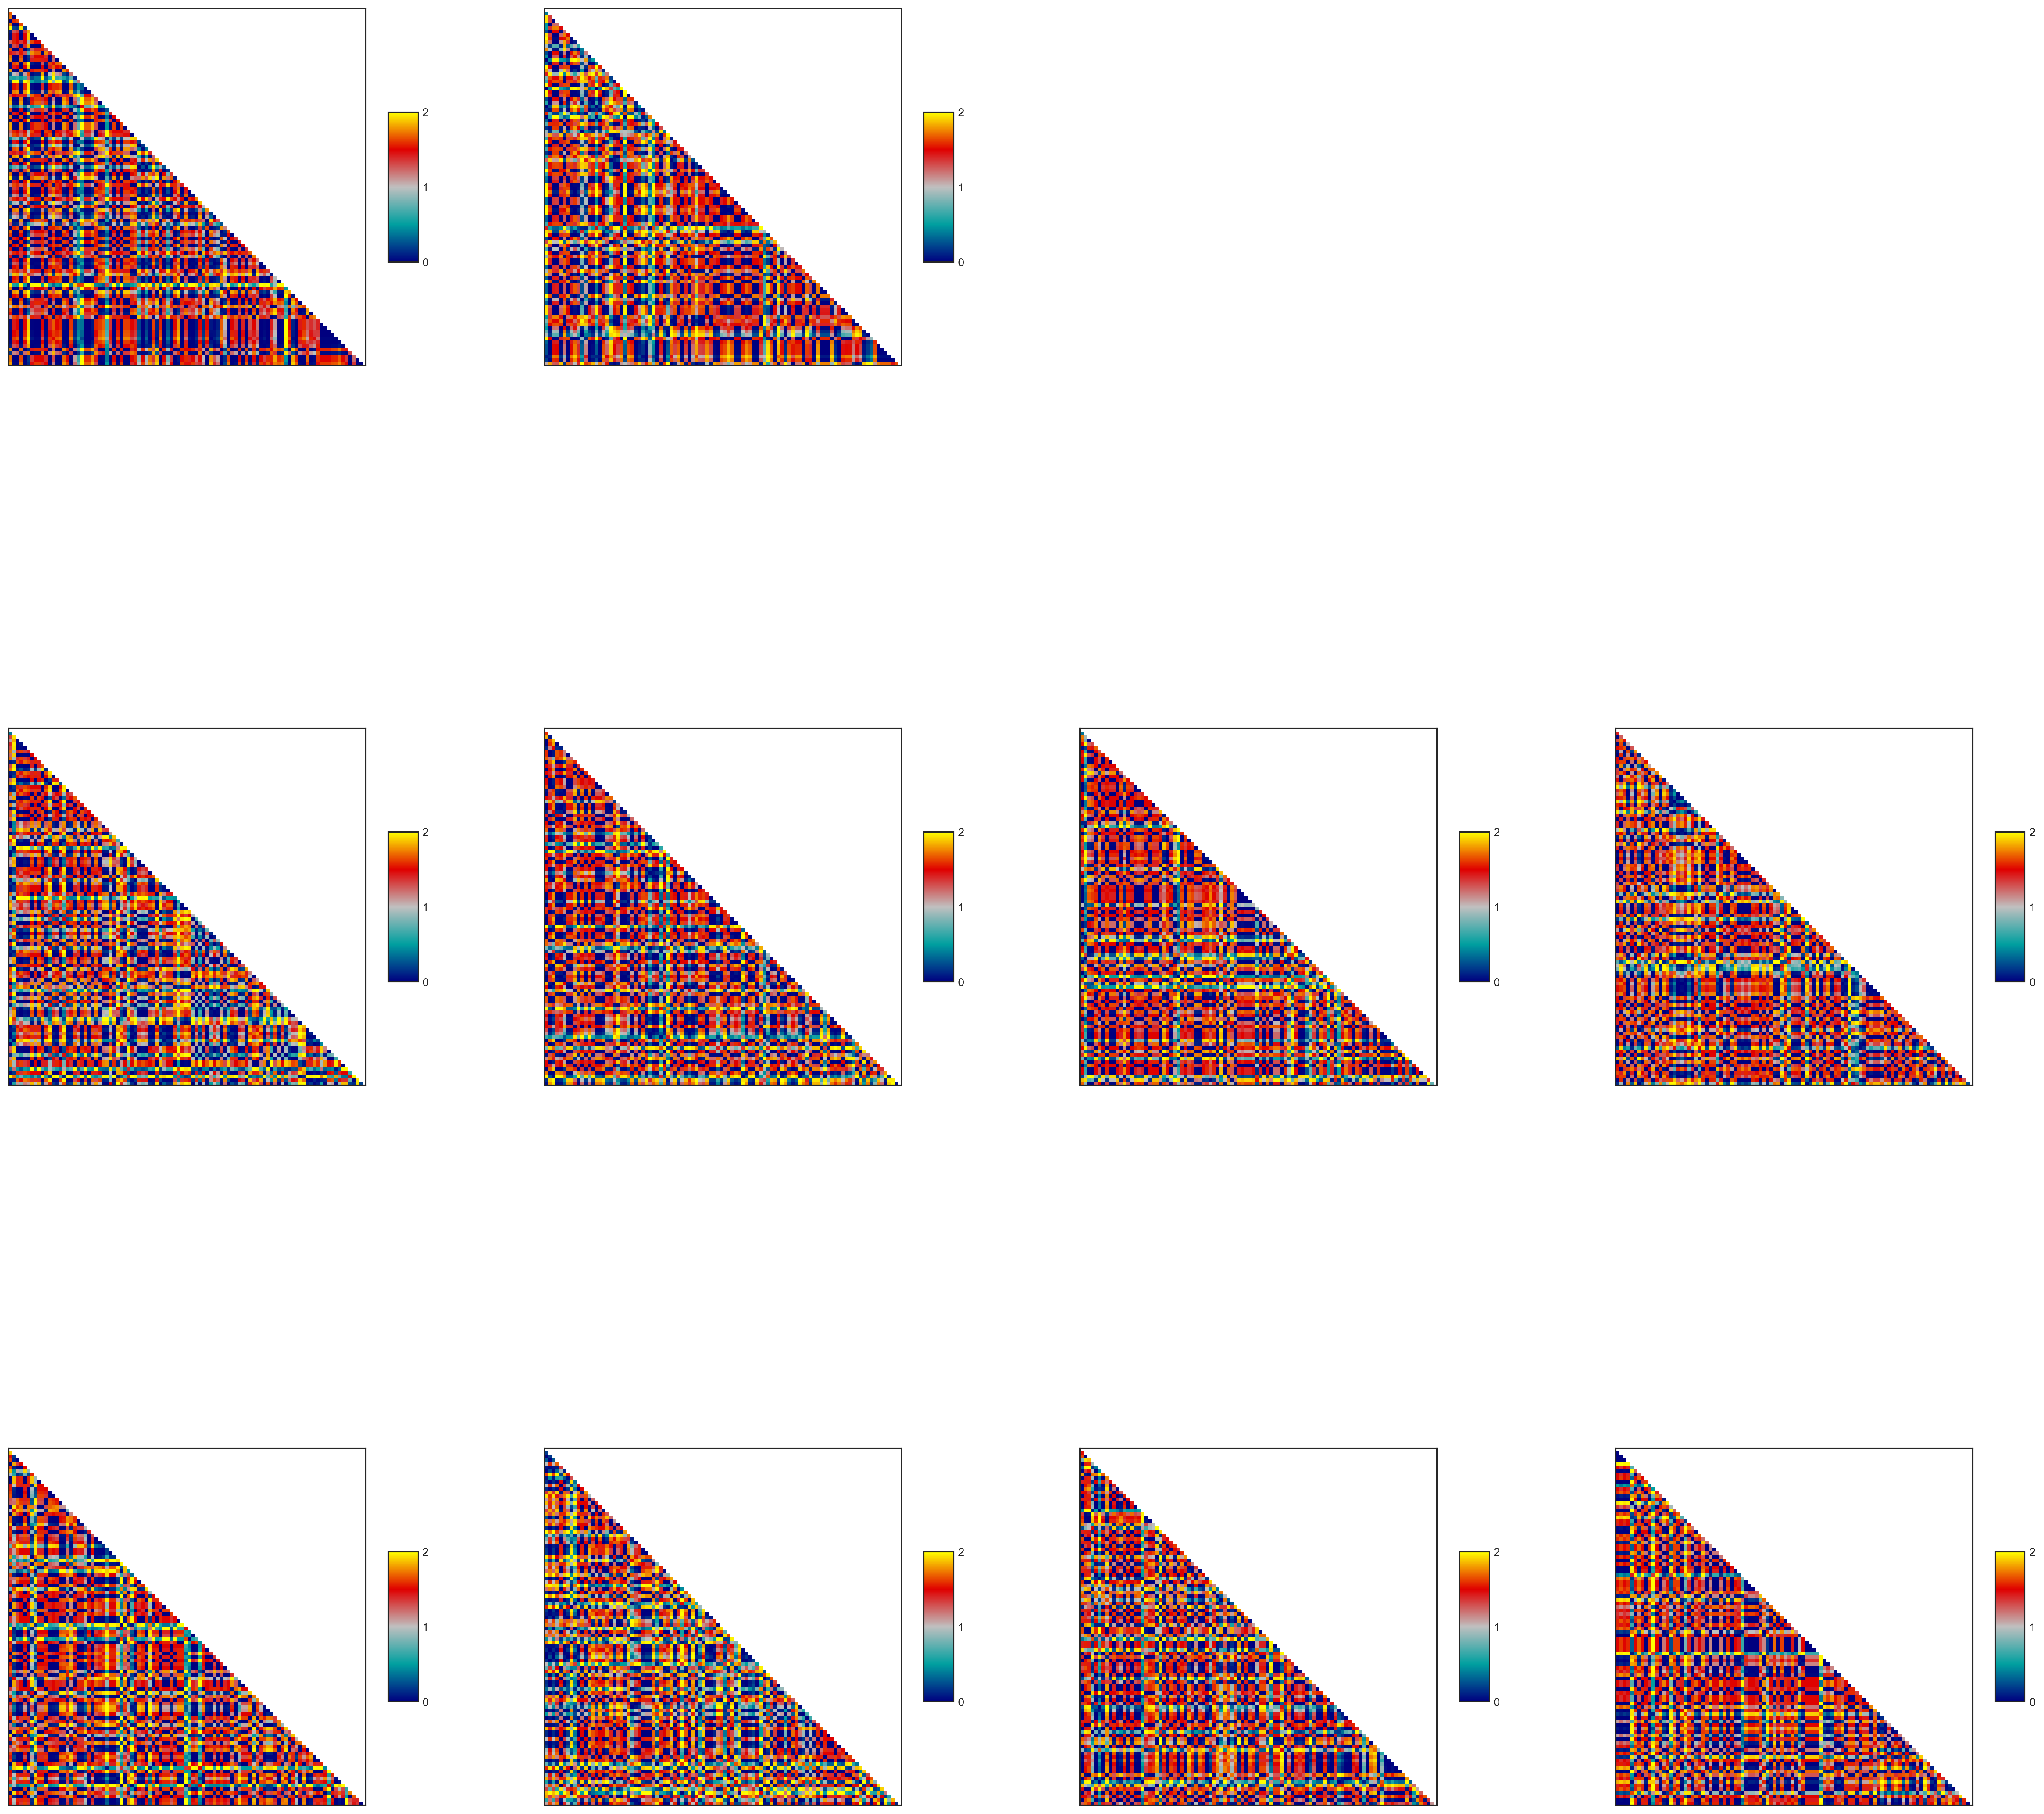

In [29]:
with open('./PHASE/Human_Experiment_Files/human_rating_labels_all', 'rb') as file:
    human_ratings_all = pickle.load(file)
    human_ratings_all_dict = human_ratings_all.to_dict()

HR_wAmb = {}
for k,v in human_ratings_all_dict['relationship'].items():
  temp = {'friendly':0, 'neutral':0, 'adversarial': 0}
  divisor = float(sum(v.values()))
  for label, count in v.items():
    temp[label] = round(count/divisor,4) #done so that sums to 1, otherwise calc_rdm gives error

  if sum(temp.values()) != 1:
    temp[label] += (1-sum(temp.values()))   #done so that sums to 1, otherwise calc_rdm gives error

  id = k.split("/")[-1][:23]
  HR_wAmb[id] = temp


rdm_list = []
for bootstrap_no in range(10):
  with open('./Outputs/Predictions/PHASE_mysplit_humanratings_contextTrue_20230503__20230508_' + str(bootstrap_no) + '_SocialGNN_E', "rb") as f:
      true = pickle.load(f)
      pred = pickle.load(f)

  # pick the one in this bootstrap
  HR_wAmb_list = []
  for name in pred.keys():
    temp = HR_wAmb[name[:23]]
    HR_wAmb_list.append(list(temp.values()))

  df = pd.DataFrame(HR_wAmb_list)
  data = rsatoolbox.data.Dataset(df.values)
  rdm = rsatoolbox.rdm.calc_rdm(data, method = "correlation")

  rdm_list.append(rdm)

rdms_HRwAmb = rsatoolbox.rdm.concat(rdm_list)

mask = np.triu(np.ones(n_videos, dtype=bool))
rsatoolbox.vis.show_rdm(rdms_HRwAmb, figsize = (30,30), show_colorbar='panel', nanmask=mask, cmap = "classic")
plt.show()

## Unique Variance Explained in HR

#### Install pingouin package for semipartial corr

In [30]:
!pip install pingouin --upgrade

In [12]:
!pip install statannotations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


#### Correlation

In [31]:
from scipy.stats import permutation_test
import random

def statistic(x, y):
    return scipy.stats.spearmanr(x,y)[0]

def pvalue_r_perm_across_bootstraps(rdms1,rdms2):
  observed = []
  perm_corr = []
  for bootstrap_no in range(10):
    data1 = rdms1[bootstrap_no].dissimilarities[0]
    data2 = rdms2[bootstrap_no].dissimilarities[0]
    observed.append(statistic(data1,data2))

    if bootstrap_no == 0:
      perm_corr = np.array([[statistic(data1, np.random.permutation(data2)) for i in range(10000)]])
    else:
      temp = np.array([[statistic(data1, np.random.permutation(data2)) for i in range(10000)]])
      perm_corr = np.append(perm_corr, temp, axis = 0)

  perm_corr = np.mean(perm_corr, axis = 0)
  return observed, (sum(perm_corr>=np.mean(observed))+1)/len(perm_corr)*2, perm_corr


spearman_r = {'simple_socialgnn' : [], 'simple_hr' : [], 'socialgnn_hr' : []}
p_values_r = {'simple_socialgnn' : [], 'simple_hr' : [], 'socialgnn_hr' : [], 'simple_me' : [], 'socialgnn_me' : [], 'hr_me' : []}

spearman_r['simple_socialgnn'], p_values_r['simple_socialgnn'], _ = pvalue_r_perm_across_bootstraps(rdms_SIMPLE,rdms_SocialGNN)
spearman_r['simple_hr'], p_values_r['simple_hr'], _ = pvalue_r_perm_across_bootstraps(rdms_SIMPLE,rdms_HRwAmb)
spearman_r['socialgnn_hr'], p_values_r['socialgnn_hr'], _ = pvalue_r_perm_across_bootstraps(rdms_SocialGNN,rdms_HRwAmb)
spearman_r['socialgnn_me'], p_values_r['socialgnn_me'], _ = pvalue_r_perm_across_bootstraps(rdms_SocialGNN,rdms_ME)
spearman_r['simple_me'], p_values_r['simple_me'], _ = pvalue_r_perm_across_bootstraps(rdms_SIMPLE,rdms_ME)
spearman_r['hr_me'], p_values_r['hr_me'], _  = pvalue_r_perm_across_bootstraps(rdms_HRwAmb,rdms_ME)


spearman_r, p_values_r


({'simple_socialgnn': [0.2939851741831559,
   0.2659808387264685,
   0.3201057339051617,
   0.22802366336791827,
   0.30038203436277694,
   0.15151120095918352,
   0.20875017010929506,
   0.1833247840061839,
   0.16053086021741528,
   0.2703846179786594],
  'simple_hr': [0.2452724764942905,
   0.2591975769279236,
   0.32257200951936127,
   0.18012748099014939,
   0.3213733577474682,
   0.21503268249330756,
   0.22024814999249706,
   0.245614341902954,
   0.2228403897262497,
   0.26727825115807735],
  'socialgnn_hr': [0.539008613922036,
   0.45488052330245077,
   0.5272391019999242,
   0.4791428194373233,
   0.44711903569431477,
   0.41884721445973644,
   0.4057818637128206,
   0.47752698370499175,
   0.46113839472815377,
   0.5215384447265855],
  'socialgnn_me': [0.053927899404344365,
   0.03167942053836072,
   0.07239919436024048,
   0.07031874737761318,
   0.0869221829696188,
   0.024262190399744525,
   0.06077159121026135,
   0.08513248018235126,
   0.057229407298431324,
   0.134401

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SocialGNN vs. Inverse Planning: Custom statistical test with Holm-Bonferroni correction, P_val:1.953e-03


/var/folders/zl/yjjv711s5cv2761fc92nr3znygt67c/T/ipykernel_65367/1089602110.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_yticklabels(f.get_yticklabels(),rotation = 0, weight = "bold")


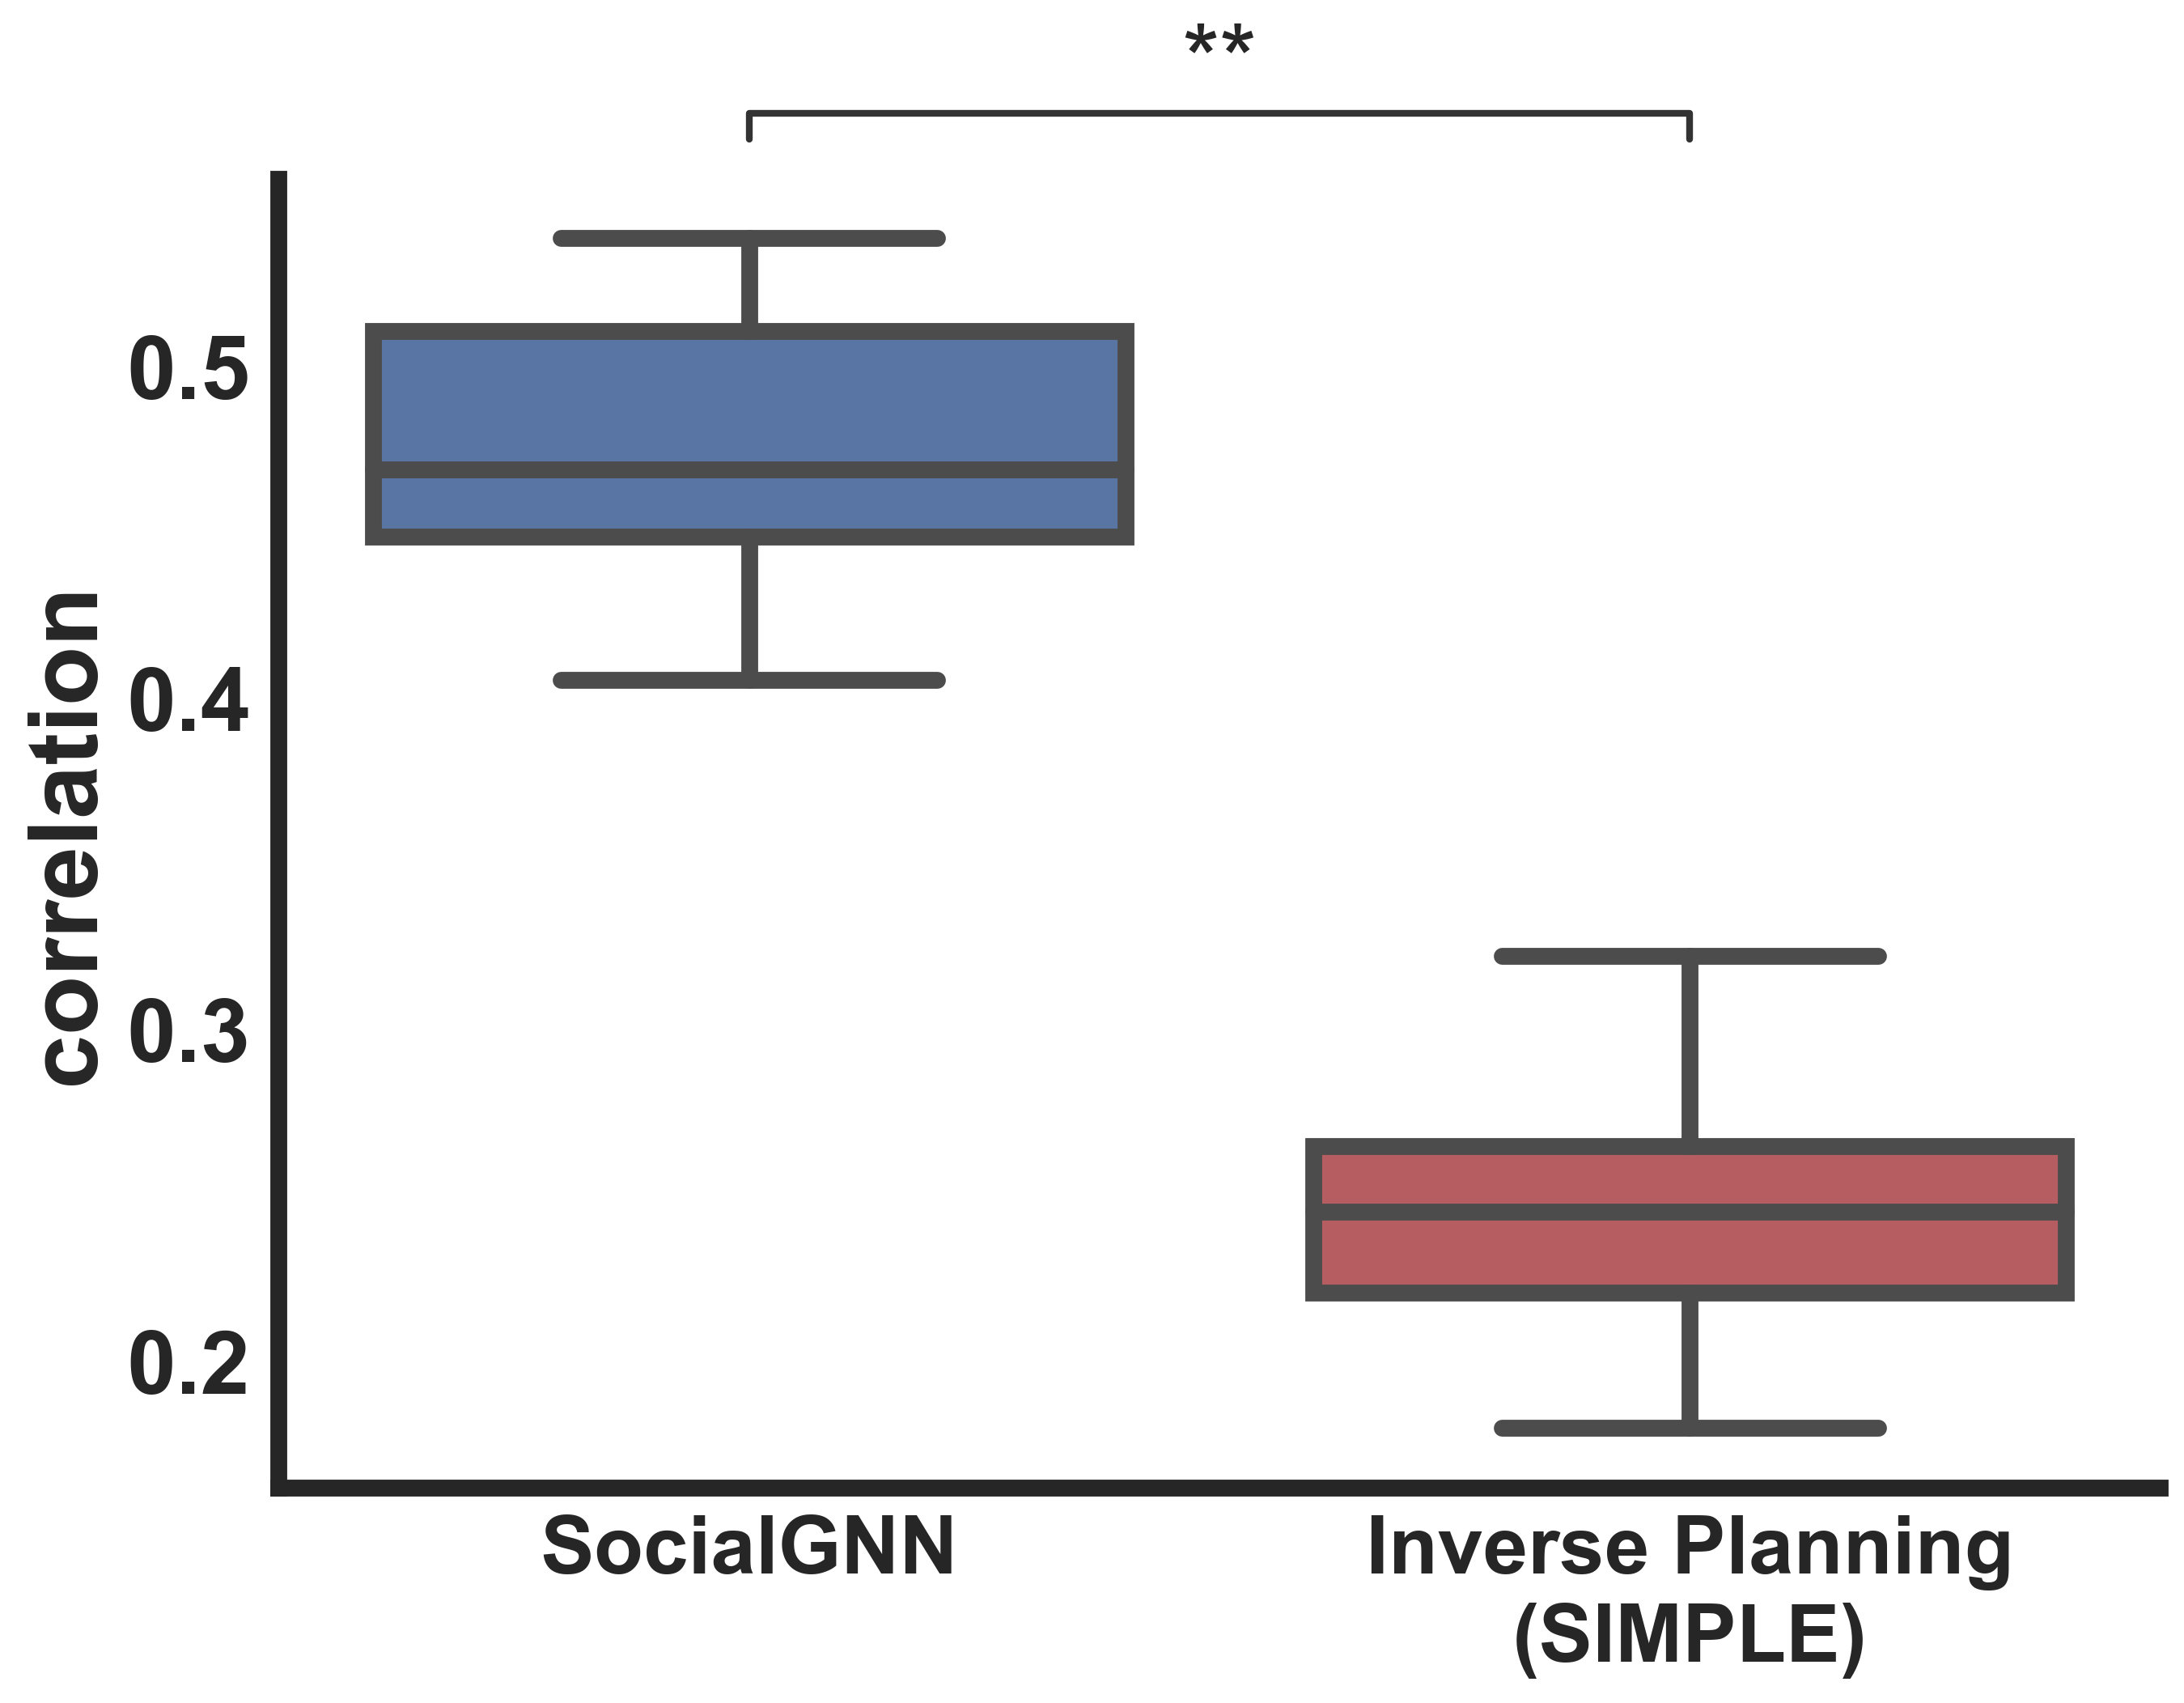

In [32]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, context = "paper", font_scale = 3, style="white")
plt.rcParams["figure.figsize"] = (10,7)

def paired_mean_difference(data2, data1):
    return np.mean(np.array(data2) - np.array(data1))

df = pd.DataFrame([spearman_r['socialgnn_hr'], spearman_r['simple_hr']]).T
df.columns = ['SocialGNN', 'Inverse Planning']
#p = [(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]
p = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),   (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]
#f = sns.barplot(data=df, palette = p, linewidth = 5, errwidth = 5, edgecolor ='k')
f = sns.boxplot(data=df, linewidth=5, palette = p)

from statannotations.Annotator import Annotator
# Significance testing
order = ['SocialGNN', 'Inverse Planning']
pairs=[("SocialGNN", "Inverse Planning")]
annotator = Annotator(f, pairs, data=df, order=order)
pvalues = []
for pair in pairs:
    data1 = spearman_r['socialgnn_hr']
    data2 = spearman_r['simple_hr']
    res = permutation_test((data1, data2), statistic=paired_mean_difference, permutation_type='samples', n_resamples=10000)
    pvalues.append(res.pvalue)
(annotator
 .configure(comparisons_correction="HB", test=None, test_short_name='permuation_test', text_format='star', loc='outside', line_width = 2, line_offset=0.01, text_offset=0.01)
 .set_pvalues(pvalues=pvalues)
 .annotate())

f.set(xlabel=None)
plt.ylabel('correlation', weight="bold")
f.set_xticklabels(['SocialGNN', 'Inverse Planning (SIMPLE)'],rotation = 0, weight = "bold", fontsize=24)
import textwrap
f.set_xticklabels(textwrap.fill(x.get_text(), 20) for x in f.get_xticklabels())
f.set_yticklabels(f.get_yticklabels(),rotation = 0, weight = "bold")

#plt.text(x=0-0.1, y=0.55, s="****")
#plt.text(x=1-0.1, y=0.55, s="****")

sns.despine()
f.spines['left'].set_linewidth(5)
f.spines['bottom'].set_linewidth(5)

#plt.savefig("PHASE_mainset_corr2.png", bbox_inches = 'tight', transparent = True)

plt.show()

#### Semipartial Corr

In [33]:
import pingouin
from scipy.stats import permutation_test

def statistic_sr(x,y,z):
  df = pd.DataFrame(list(zip(x, y, z)),
               columns =['HR', 'X', 'Z'])
  return df.partial_corr(x='X', y='HR', x_covar=[ 'Z'], method='spearman')['r'][0]

def pvalue_sr_perm_across_bootstraps(rdms1,rdms2,rdms_c):
  observed = []
  perm_corr = []
  for bootstrap_no in range(10):
    data1 = rdms1[bootstrap_no].dissimilarities[0]
    data2 = rdms2[bootstrap_no].dissimilarities[0]
    data_c = rdms_c[bootstrap_no].dissimilarities[0]
    observed.append(statistic_sr(data1,data2, data_c))
    if bootstrap_no == 0:
      perm_corr = np.array([[statistic_sr(np.random.permutation(data1), data2,data_c) for i in range(10000)]])
    else:
      temp = np.array([[statistic_sr(np.random.permutation(data1), data2,data_c) for i in range(10000)]])
      perm_corr = np.append(perm_corr, temp, axis = 0)

  perm_corr = np.mean(perm_corr, axis = 0)
  return observed, (sum(perm_corr>=np.mean(observed))+1)/len(perm_corr)*2, perm_corr

pvalue_sr_perm_across_bootstraps(rdms_HRwAmb, rdms_SocialGNN, rdms_SIMPLE)

semipartial_r = { 'socialgnn_hr' : [], 'simple_hr' : []}
p_values_sr = { 'socialgnn_hr' : [], 'simple_hr' : []}


semipartial_r['socialgnn_hr'], p_values_sr['socialgnn_hr'], _ = pvalue_sr_perm_across_bootstraps(rdms_HRwAmb, rdms_SocialGNN, rdms_SIMPLE)
semipartial_r['simple_hr'], p_values_sr['simple_hr'], _ = pvalue_sr_perm_across_bootstraps(rdms_HRwAmb, rdms_SIMPLE, rdms_SocialGNN)

semipartial_r, p_values_sr

({'socialgnn_hr': [0.48848845701225124,
   0.40036059737993596,
   0.4475301739252187,
   0.4499224321366799,
   0.36755848079567544,
   0.3907786830832892,
   0.3679104599941617,
   0.43995598503654854,
   0.4309547644686715,
   0.46665219742448916],
  'simple_hr': [0.0908255166662862,
   0.14337259619541842,
   0.16234188375526812,
   0.07278916766452648,
   0.19612404185742496,
   0.1533428988636145,
   0.13859449206221447,
   0.16079693265579864,
   0.15076879391683173,
   0.13114719812256262]},
 {'socialgnn_hr': 0.0002, 'simple_hr': 0.0002})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

SocialGNN vs. Inverse Planning: Custom statistical test with Holm-Bonferroni correction, P_val:1.953e-03


/var/folders/zl/yjjv711s5cv2761fc92nr3znygt67c/T/ipykernel_65367/2122014485.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  f.set_yticklabels(f.get_yticklabels(),rotation = 0, weight = "bold")


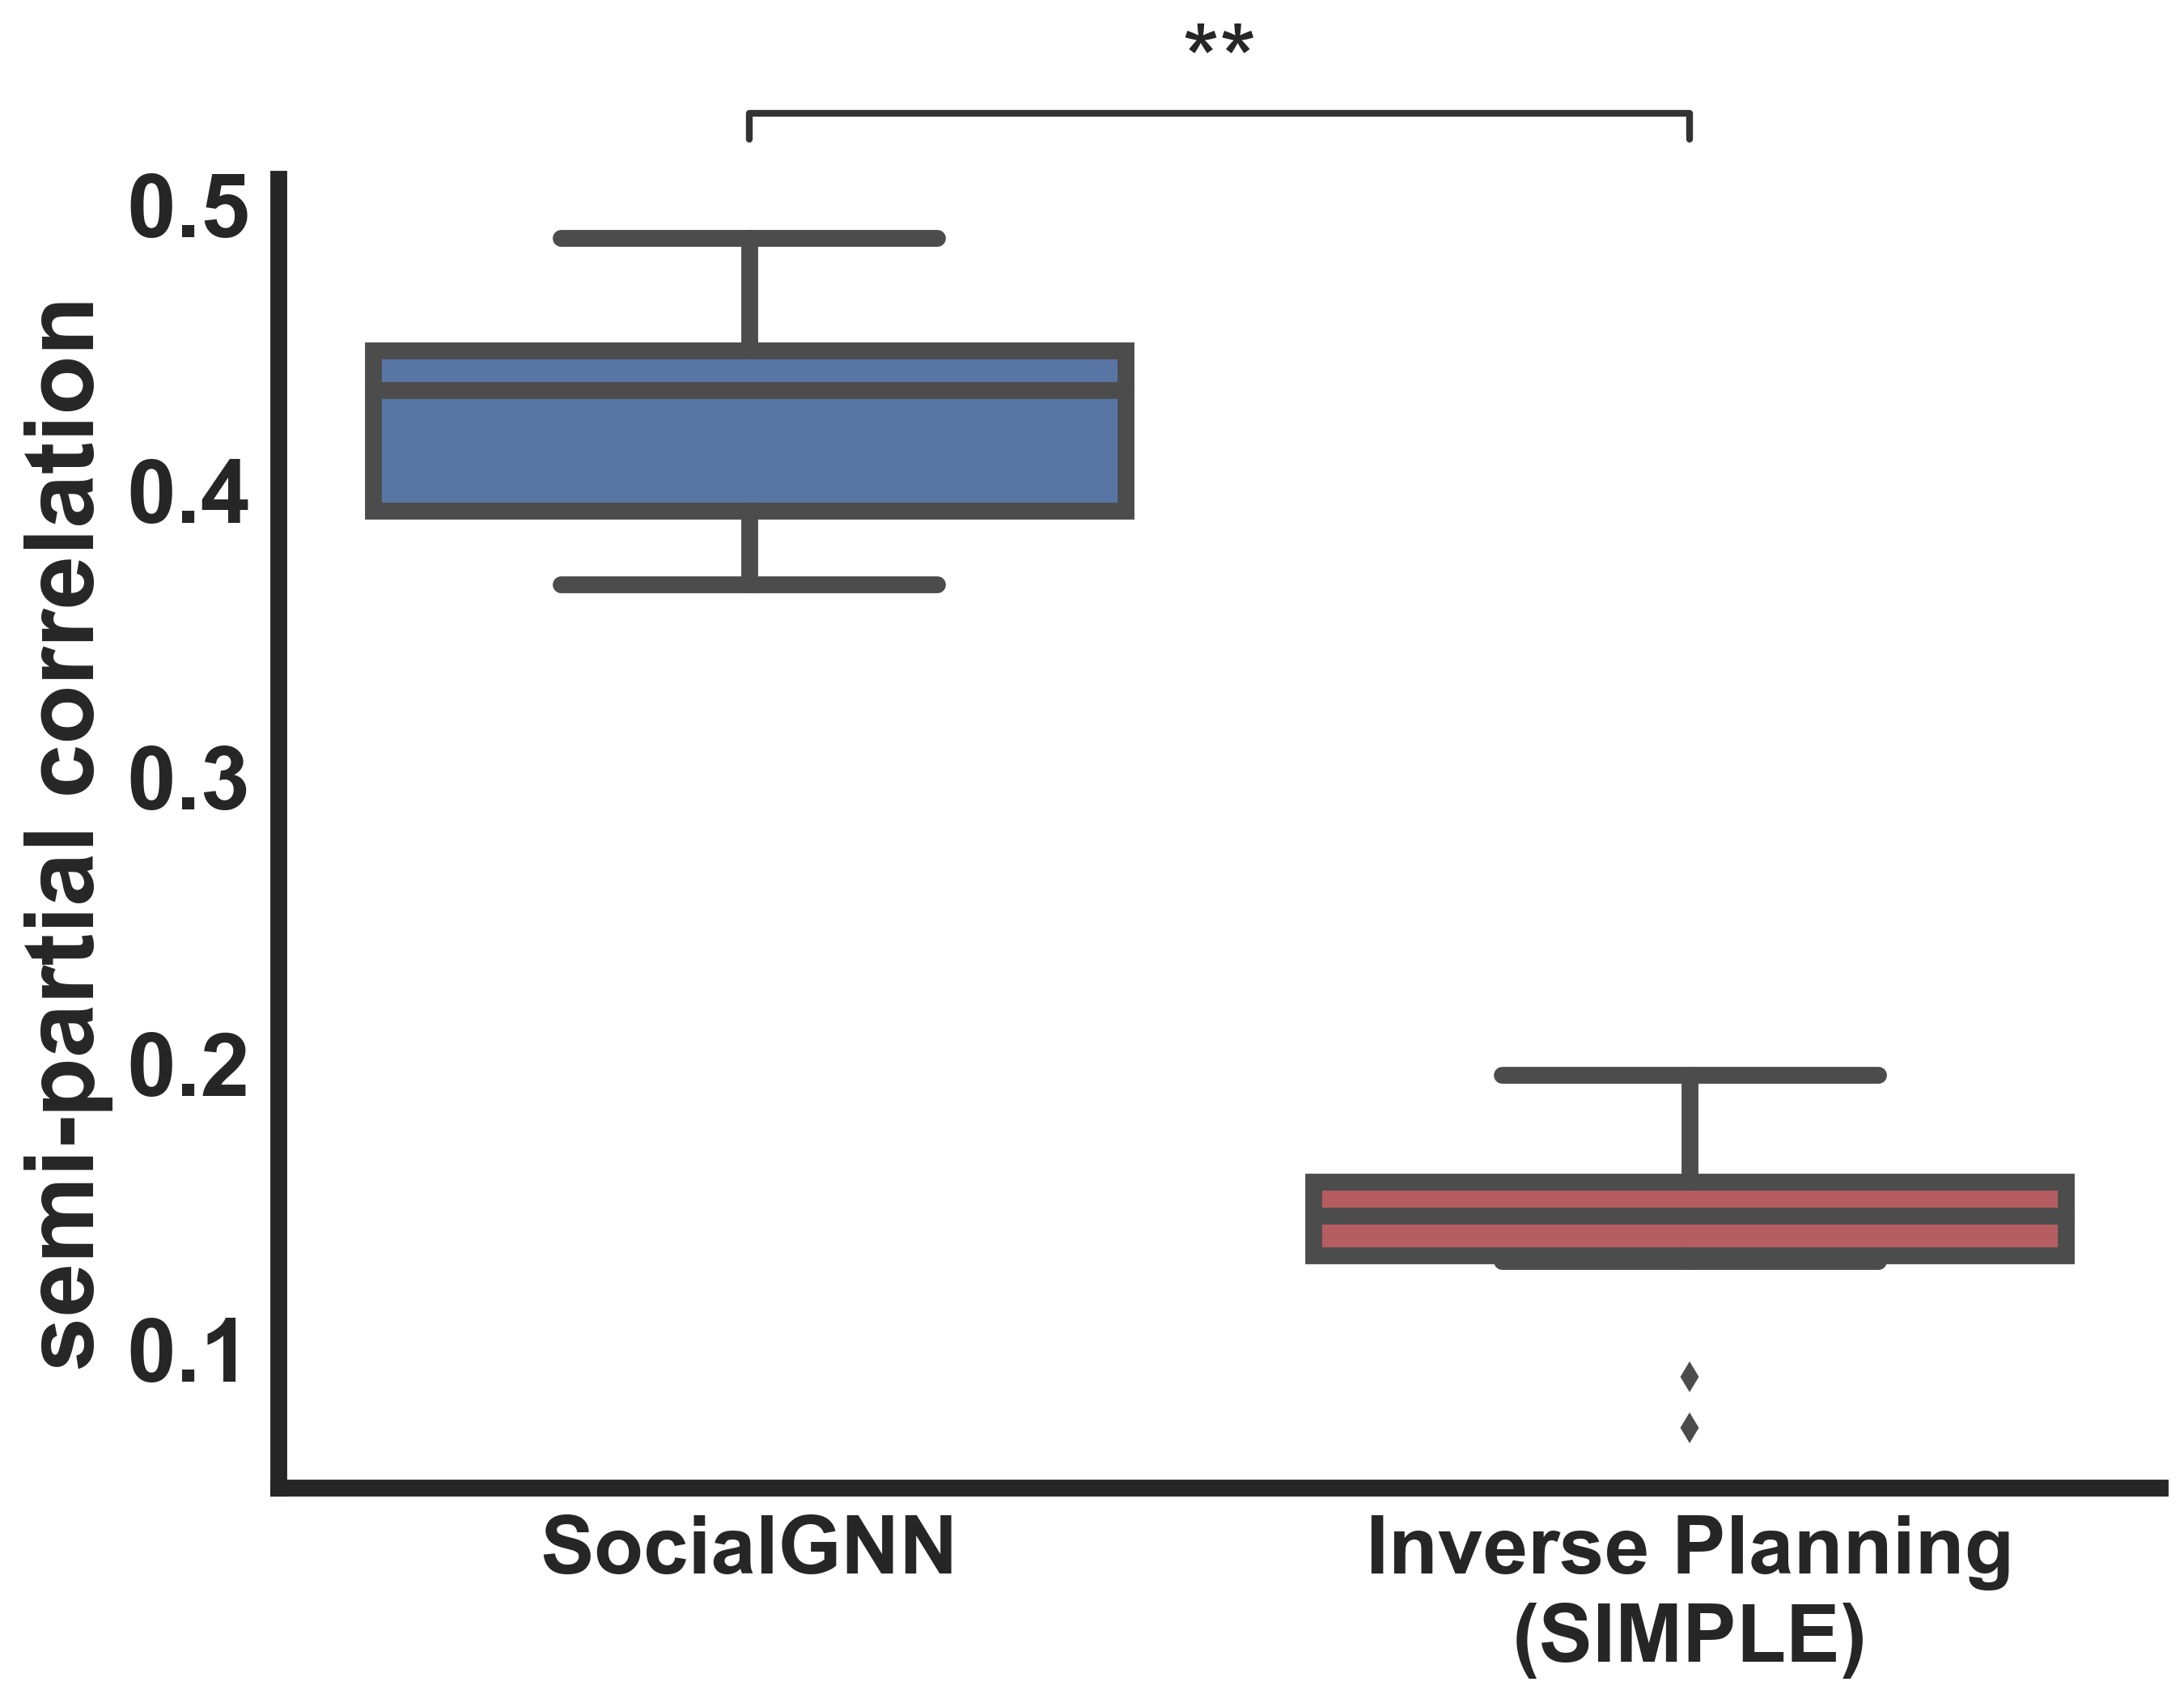

In [34]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300}, context = "paper", font_scale = 3, style="white")
plt.rcParams["figure.figsize"] = (10,7)

def paired_mean_difference(data2, data1):
    return np.mean(np.array(data2) - np.array(data1))


df = pd.DataFrame([semipartial_r['socialgnn_hr'], semipartial_r['simple_hr']]).T
df.columns = ['SocialGNN', 'Inverse Planning']
#p = [(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]
p = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),   (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]
#f = sns.barplot(data=df, palette = p, linewidth = 5, errwidth = 5, edgecolor ='k')
f = sns.boxplot(data=df, linewidth=5, palette = p)

from statannotations.Annotator import Annotator
# Significance testing
order = ['SocialGNN', 'Inverse Planning']
pairs=[("SocialGNN", "Inverse Planning")]
annotator = Annotator(f, pairs, data=df, order=order)
pvalues = []
for pair in pairs:
    data1 = semipartial_r['socialgnn_hr']
    data2 = semipartial_r['simple_hr']
    res = permutation_test((data1, data2), statistic=paired_mean_difference, permutation_type='samples', n_resamples=10000)
    pvalues.append(res.pvalue)
(annotator
 .configure(comparisons_correction="HB", test=None, test_short_name='permuation_test', text_format='star', loc='outside', line_width = 2, line_offset=0.01, text_offset=0.01)
 .set_pvalues(pvalues=pvalues)
 .annotate())

f.set(xlabel=None)
plt.ylabel('semi-partial correlation', weight="bold")
f.set_xticklabels(['SocialGNN', 'Inverse Planning (SIMPLE)'],rotation = 0, weight = "bold", fontsize=24)
import textwrap
f.set_xticklabels(textwrap.fill(x.get_text(), 20) for x in f.get_xticklabels())
f.set_yticklabels(f.get_yticklabels(),rotation = 0, weight = "bold")

#plt.text(x=0-0.1, y=0.55, s="****")
#plt.text(x=1-0.1, y=0.55, s="****")

sns.despine()
f.spines['left'].set_linewidth(5)
f.spines['bottom'].set_linewidth(5)

#plt.savefig("PHASE_mainset_semipartr2.png", bbox_inches = 'tight', transparent = True)

plt.show()